In [1]:
import pandas as pd
import numpy as np
pd.reset_option("^display")
pd.set_option('display.max_rows', 10)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup complete.")
import matplotlib.image as mpimg

Setup complete.


In [2]:
HealthTrain_path = "C:/Users/JT/DataSetsforDM/health_train.csv"

In [3]:
CATEGORICAL_COLUMNS = ["id","x3","x14"]
CONTINUOUS_COLUMNS = ["x1", "x2","x4","x5","x6","x7","x8","x9","x10","x11","x12","x13","x15","x16","x17","x18","x19","x20","x21","x22","x23","x24"]

In [4]:
HealthTrain_data = pd.read_csv(HealthTrain_path)

In [5]:
print(HealthTrain_data.shape)
HealthTrain_data

(1584, 26)


,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,target
0,PA1001,1406,145.0,F,0.005,0.000,0.002,0.000,0.0,0.000,...,104.0,171.0,4.0,0.0,155.0,153.0,154.0,4.0,1.0,Low risk
1,PA1002,258,127.0,M,0.012,0.000,0.008,0.004,0.0,0.000,...,53.0,191.0,12.0,1.0,133.0,126.0,131.0,41.0,0.0,Low risk
2,PA1003,479,145.0,F,0.000,0.000,0.000,0.002,0.0,0.000,...,111.0,157.0,1.0,1.0,150.0,146.0,149.0,6.0,1.0,Low risk
3,PA1004,906,146.0,F,0.004,0.000,0.005,0.003,0.0,0.000,...,107.0,169.0,2.0,2.0,150.0,147.0,149.0,7.0,0.0,Low risk
4,PA1005,1921,140.0,F,0.002,0.003,0.006,0.006,0.0,0.000,...,75.0,228.0,9.0,0.0,142.0,118.0,142.0,20.0,0.0,Low risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,PA2580,2077,130.0,M,0.005,0.001,0.001,0.000,0.0,0.000,...,127.0,158.0,2.0,0.0,139.0,139.0,140.0,3.0,0.0,Low risk
1580,PA2581,664,138.0,F,0.000,0.003,0.003,0.000,0.0,0.002,...,69.0,187.0,10.0,1.0,142.0,130.0,140.0,61.0,0.0,Moderate risk
1581,PA2582,1431,144.0,F,0.000,0.000,0.006,0.000,0.0,0.000,...,139.0,169.0,2.0,0.0,157.0,155.0,157.0,2.0,0.0,Moderate risk
1582,PA2583,630,134.0,F,0.017,0.002,0.004,0.000,0.0,0.000,...,50.0,170.0,5.0,0.0,160.0,150.0,155.0,28.0,1.0,Low risk


In [6]:
pd.set_option("display.max_columns", None)

In [7]:
print(HealthTrain_data.shape)
HealthTrain_data

(1584, 26)


,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,target
0,PA1001,1406,145.0,F,0.005,0.000,0.002,0.000,0.0,0.000,46.0,0.8,0.0,8.6,O+,67.0,104.0,171.0,4.0,0.0,155.0,153.0,154.0,4.0,1.0,Low risk
1,PA1002,258,127.0,M,0.012,0.000,0.008,0.004,0.0,0.000,13.0,3.8,0.0,1.3,A+,138.0,53.0,191.0,12.0,1.0,133.0,126.0,131.0,41.0,0.0,Low risk
2,PA1003,479,145.0,F,0.000,0.000,0.000,0.002,0.0,0.000,57.0,0.5,0.0,7.3,O+,46.0,111.0,157.0,1.0,1.0,150.0,146.0,149.0,6.0,1.0,Low risk
3,PA1004,906,146.0,F,0.004,0.000,0.005,0.003,0.0,0.000,29.0,1.2,1.0,7.0,O+,62.0,107.0,169.0,2.0,2.0,150.0,147.0,149.0,7.0,0.0,Low risk
4,PA1005,1921,140.0,F,0.002,0.003,0.006,0.006,0.0,0.000,62.0,1.6,0.0,9.1,B+,153.0,75.0,228.0,9.0,0.0,142.0,118.0,142.0,20.0,0.0,Low risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,PA2580,2077,130.0,M,0.005,0.001,0.001,0.000,0.0,0.000,72.0,0.9,8.0,4.4,B-,31.0,127.0,158.0,2.0,0.0,139.0,139.0,140.0,3.0,0.0,Low risk
1580,PA2581,664,138.0,F,0.000,0.003,0.003,0.000,0.0,0.002,60.0,1.0,8.0,7.5,B+,118.0,69.0,187.0,10.0,1.0,142.0,130.0,140.0,61.0,0.0,Moderate risk
1581,PA2582,1431,144.0,F,0.000,0.000,0.006,0.000,0.0,0.000,45.0,0.7,0.0,9.8,O-,30.0,139.0,169.0,2.0,0.0,157.0,155.0,157.0,2.0,0.0,Moderate risk
1582,PA2583,630,134.0,F,0.017,0.002,0.004,0.000,0.0,0.000,48.0,2.2,0.0,0.0,A+,120.0,50.0,170.0,5.0,0.0,160.0,150.0,155.0,28.0,1.0,Low risk


In [8]:
HealthTrain_data['x3']

0       F
1       M
2       F
3       F
4       F
       ..
1579    M
1580    F
1581    F
1582    F
1583    F
Name: x3, Length: 1584, dtype: object

In [9]:
HealthTrain_data.loc[:,['id','x3','x14','target']]

,id,x3,x14,target
0,PA1001,F,O+,Low risk
1,PA1002,M,A+,Low risk
2,PA1003,F,O+,Low risk
3,PA1004,F,O+,Low risk
4,PA1005,F,B+,Low risk
...,...,...,...,...
1579,PA2580,M,B-,Low risk
1580,PA2581,F,B+,Moderate risk
1581,PA2582,F,O-,Moderate risk
1582,PA2583,F,A+,Low risk


In [10]:
HealthTrain_data.loc[0:15,['id','x3','x14','target']]

,id,x3,x14,target
0,PA1001,F,O+,Low risk
1,PA1002,M,A+,Low risk
2,PA1003,F,O+,Low risk
3,PA1004,F,O+,Low risk
4,PA1005,F,B+,Low risk
...,...,...,...,...
11,PA1012,F,O+,Low risk
12,PA1013,F,O-,Moderate risk
13,PA1014,M,A+,Low risk
14,PA1015,M,A+,High risk


In [11]:
HealthTrain_data.loc[:,['id','x3','x6','x10','x14','x24','target']]

,id,x3,x6,x10,x14,x24,target
0,PA1001,F,0.002,46.0,O+,1.0,Low risk
1,PA1002,M,0.008,13.0,A+,0.0,Low risk
2,PA1003,F,0.000,57.0,O+,1.0,Low risk
3,PA1004,F,0.005,29.0,O+,0.0,Low risk
4,PA1005,F,0.006,62.0,B+,0.0,Low risk
...,...,...,...,...,...,...,...
1579,PA2580,M,0.001,72.0,B-,0.0,Low risk
1580,PA2581,F,0.003,60.0,B+,0.0,Moderate risk
1581,PA2582,F,0.006,45.0,O-,0.0,Moderate risk
1582,PA2583,F,0.004,48.0,A+,1.0,Low risk


In [12]:
HealthTrain_data.loc[(HealthTrain_data.x3=='F')]

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,target
0,PA1001,1406,145.0,F,0.005,0.000,0.002,0.000,0.0,0.000,46.0,0.8,0.0,8.6,O+,67.0,104.0,171.0,4.0,0.0,155.0,153.0,154.0,4.0,1.0,Low risk
2,PA1003,479,145.0,F,0.000,0.000,0.000,0.002,0.0,0.000,57.0,0.5,0.0,7.3,O+,46.0,111.0,157.0,1.0,1.0,150.0,146.0,149.0,6.0,1.0,Low risk
3,PA1004,906,146.0,F,0.004,0.000,0.005,0.003,0.0,0.000,29.0,1.2,1.0,7.0,O+,62.0,107.0,169.0,2.0,2.0,150.0,147.0,149.0,7.0,0.0,Low risk
4,PA1005,1921,140.0,F,0.002,0.003,0.006,0.006,0.0,0.000,62.0,1.6,0.0,9.1,B+,153.0,75.0,228.0,9.0,0.0,142.0,118.0,142.0,20.0,0.0,Low risk
5,PA1006,70,144.0,F,0.001,0.000,0.005,0.000,0.0,0.000,45.0,0.8,2.0,11.5,O-,30.0,138.0,168.0,3.0,0.0,162.0,157.0,160.0,5.0,1.0,Low risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,PA2579,1731,134.0,F,0.008,0.001,0.010,0.006,0.0,0.000,61.0,1.1,0.0,3.7,O+,109.0,80.0,189.0,10.0,0.0,156.0,144.0,151.0,61.0,0.0,Low risk
1580,PA2581,664,138.0,F,0.000,0.003,0.003,0.000,0.0,0.002,60.0,1.0,8.0,7.5,B+,118.0,69.0,187.0,10.0,1.0,142.0,130.0,140.0,61.0,0.0,Moderate risk
1581,PA2582,1431,144.0,F,0.000,0.000,0.006,0.000,0.0,0.000,45.0,0.7,0.0,9.8,O-,30.0,139.0,169.0,2.0,0.0,157.0,155.0,157.0,2.0,0.0,Moderate risk
1582,PA2583,630,134.0,F,0.017,0.002,0.004,0.000,0.0,0.000,48.0,2.2,0.0,0.0,A+,120.0,50.0,170.0,5.0,0.0,160.0,150.0,155.0,28.0,1.0,Low risk


In [13]:
HealthTrain_data.loc[(HealthTrain_data.x3=='M')]

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,target
1,PA1002,258,127.0,M,0.012,0.000,0.008,0.004,0.0,0.0,13.0,3.8,0.0,1.3,A+,138.0,53.0,191.0,12.0,1.0,133.0,126.0,131.0,41.0,0.0,Low risk
7,PA1008,712,126.0,M,0.005,0.003,0.005,0.000,0.0,0.0,41.0,1.7,0.0,21.4,A+,100.0,50.0,150.0,4.0,0.0,133.0,130.0,132.0,10.0,1.0,Low risk
9,PA1010,1147,122.0,M,0.000,0.000,0.006,0.009,0.0,0.0,18.0,1.9,0.0,8.8,O+,44.0,91.0,135.0,4.0,0.0,126.0,117.0,121.0,19.0,1.0,Low risk
10,PA1011,1062,127.0,M,0.003,0.000,0.008,0.000,0.0,0.0,33.0,1.0,0.0,7.6,A-,32.0,114.0,146.0,0.0,0.0,129.0,130.0,132.0,3.0,0.0,Low risk
13,PA1014,561,128.0,M,0.001,0.000,0.010,0.003,0.0,0.0,37.0,2.8,0.0,16.0,A+,136.0,55.0,191.0,9.0,1.0,129.0,130.0,129.0,37.0,0.0,Low risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,PA2575,646,123.0,M,0.000,0.000,0.004,0.000,0.0,0.0,60.0,0.6,0.0,10.4,O+,52.0,84.0,136.0,4.0,0.0,125.0,124.0,126.0,2.0,1.0,Moderate risk
1575,PA2576,1790,121.0,M,0.000,0.002,0.002,0.015,0.0,0.0,61.0,2.0,0.0,4.9,A+,98.0,62.0,160.0,8.0,0.0,114.0,100.0,106.0,59.0,0.0,High risk
1576,PA2577,1665,106.0,M,0.006,0.000,0.006,0.000,0.0,0.0,64.0,0.7,0.0,12.6,O+,54.0,100.0,154.0,3.0,0.0,112.0,116.0,114.0,14.0,-1.0,Low risk
1577,PA2578,1234,125.0,M,0.002,0.000,0.004,0.001,0.0,0.0,30.0,1.1,3.0,11.0,O+,45.0,102.0,147.0,1.0,0.0,126.0,127.0,128.0,3.0,0.0,Low risk


In [14]:
HealthTrain_data['id'].describe()

count       1584
unique      1584
top       PA1001
freq           1
Name: id, dtype: object

In [15]:
HealthTrain_data['x1'].describe()

count    1584.000000
mean     1053.188131
std       615.996716
min         0.000000
25%       523.750000
50%      1049.500000
75%      1583.250000
max      2125.000000
Name: x1, dtype: float64

In [16]:
HealthTrain_data['x3'].describe()

count     1584
unique       2
top          M
freq       842
Name: x3, dtype: object

In [17]:
HealthTrain_data['x14'].describe()

count     1584
unique       8
top         O+
freq       410
Name: x14, dtype: object

In [18]:
HealthTrain_data['x14'].unique()

array(['O+', 'A+', 'B+', 'O-', 'A-', 'B-', 'AB-', 'AB+'], dtype=object)

In [19]:
HealthTrain_data['x14'].value_counts()

O+     410
A+     328
B+     307
A-     165
B-     154
O-     146
AB+     57
AB-     17
Name: x14, dtype: int64

In [20]:
HealthTrain_data['x3'].value_counts()

M    842
F    742
Name: x3, dtype: int64

In [21]:
NumericalD= HealthTrain_data[CONTINUOUS_COLUMNS].describe()
print(NumericalD)

                x1           x2           x4           x5           x6  \
count  1584.000000  1584.000000  1584.000000  1540.000000  1584.000000   
mean   1053.188131   133.297980     0.003169     0.009906     0.004347   
std     615.996716    10.002632     0.003821     0.048627     0.002948   
min       0.000000   106.000000     0.000000     0.000000     0.000000   
25%     523.750000   126.000000     0.000000     0.000000     0.002000   
50%    1049.500000   133.000000     0.002000     0.000000     0.004000   
75%    1583.250000   141.000000     0.006000     0.003000     0.007000   
max    2125.000000   160.000000     0.019000     0.477000     0.014000   

                x7           x8           x9          x10          x11  \
count  1584.000000  1567.000000  1584.000000  1557.000000  1584.000000   
mean      0.001854     0.000003     0.000157    47.094412     1.337816   
std       0.002940     0.000050     0.000593    17.269621     0.899092   
min       0.000000     0.000000     0

In [22]:
for column in CONTINUOUS_COLUMNS:
    NumericalD.loc['missing',column] = HealthTrain_data[column].isnull().sum()
print("Including sum of missing values of each numerical variable")
print(NumericalD)

Including sum of missing values of each numerical variable
                  x1           x2           x4           x5           x6  \
count    1584.000000  1584.000000  1584.000000  1540.000000  1584.000000   
mean     1053.188131   133.297980     0.003169     0.009906     0.004347   
std       615.996716    10.002632     0.003821     0.048627     0.002948   
min         0.000000   106.000000     0.000000     0.000000     0.000000   
25%       523.750000   126.000000     0.000000     0.000000     0.002000   
50%      1049.500000   133.000000     0.002000     0.000000     0.004000   
75%      1583.250000   141.000000     0.006000     0.003000     0.007000   
max      2125.000000   160.000000     0.019000     0.477000     0.014000   
missing     0.000000     0.000000     0.000000    44.000000     0.000000   

                  x7           x8           x9          x10          x11  \
count    1584.000000  1567.000000  1584.000000  1557.000000  1584.000000   
mean        0.001854     0.0

In [23]:
CategoricalD= HealthTrain_data[CATEGORICAL_COLUMNS].describe()
print(CategoricalD)

            id    x3   x14
count     1584  1584  1584
unique    1584     2     8
top     PA1001     M    O+
freq         1   842   410


In [24]:
for column in CATEGORICAL_COLUMNS:
    CategoricalD.loc['missing',column] = HealthTrain_data[column].isnull().sum()
print("Including sum of missing values of each categorical variable")
print(CategoricalD)

Including sum of missing values of each categorical variable
             id    x3   x14
count      1584  1584  1584
unique     1584     2     8
top      PA1001     M    O+
freq          1   842   410
missing       0     0     0


In [25]:
print("Let's visualize the data!")

Let's visualize the data!


In [26]:
HealthTrain_data_LR = HealthTrain_data.loc[(HealthTrain_data.target.str.strip()=='Low risk')]
HealthTrain_data_MR = HealthTrain_data.loc[(HealthTrain_data.target.str.strip()=='Moderate risk')]
HealthTrain_data_HR = HealthTrain_data.loc[(HealthTrain_data.target.str.strip()=='High risk')]

C:\Users\JT\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\JT\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\JT\AppData\Local\Temp\ipykernel_17320\3408765006.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


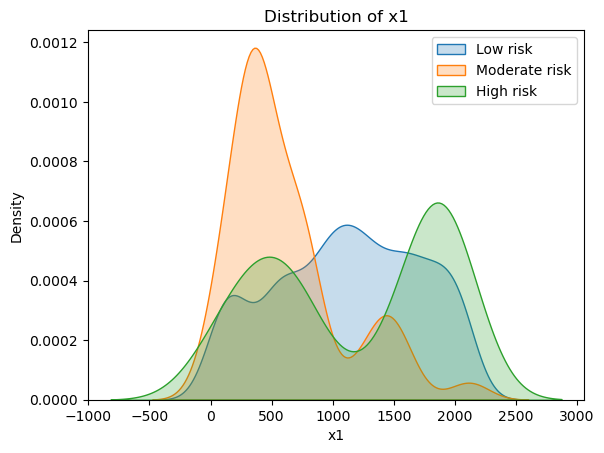

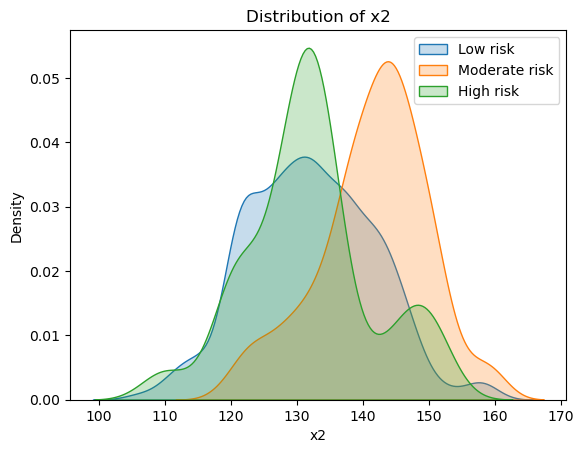

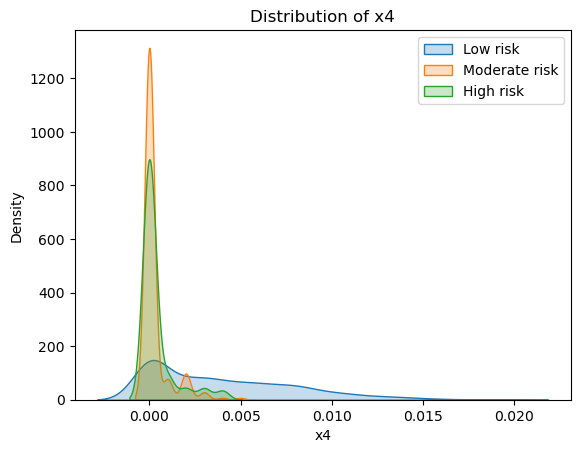

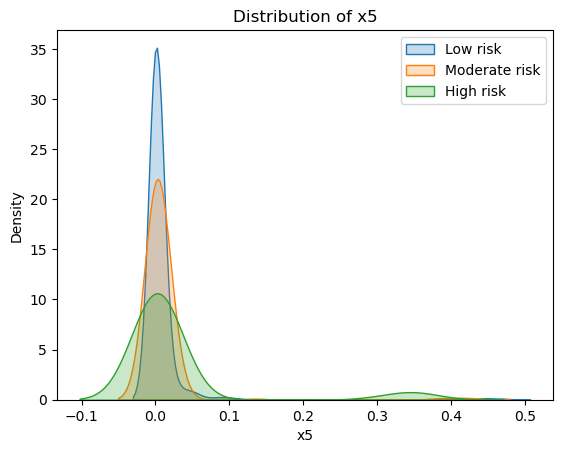

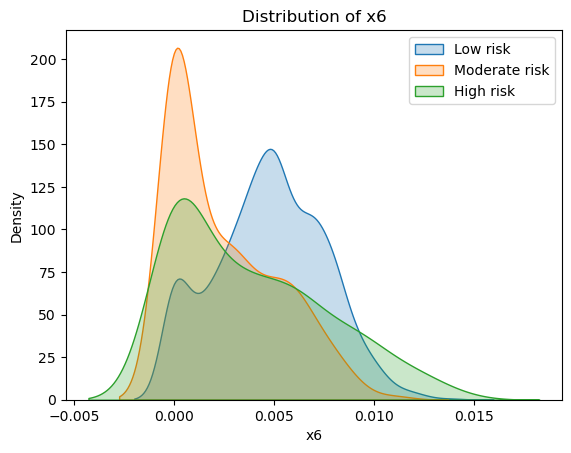

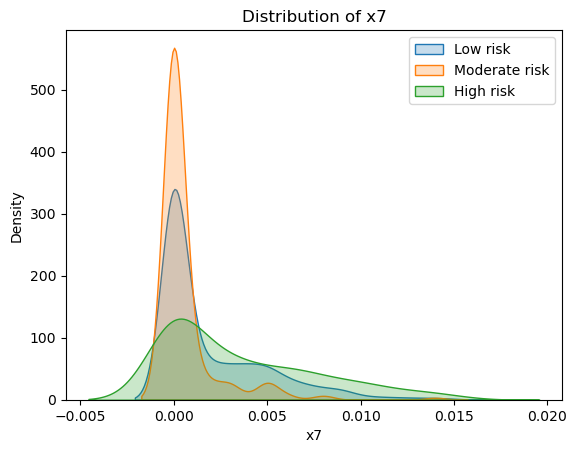

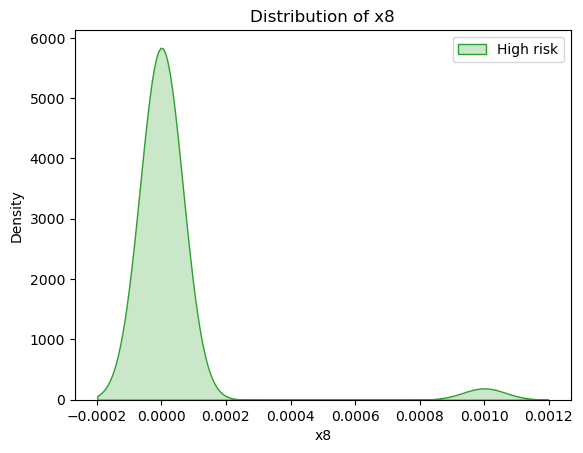

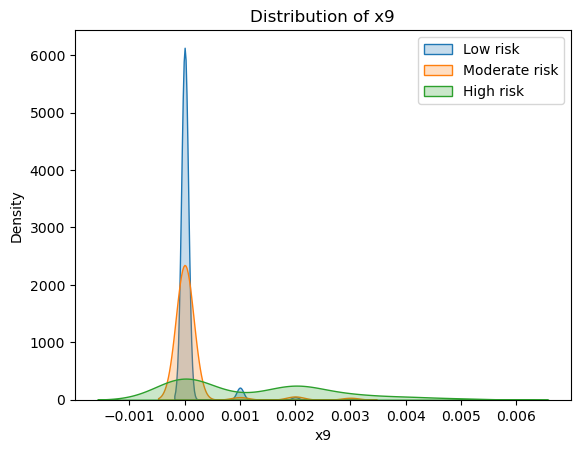

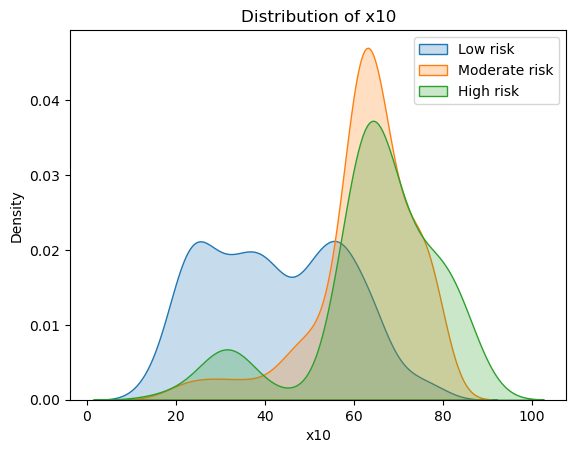

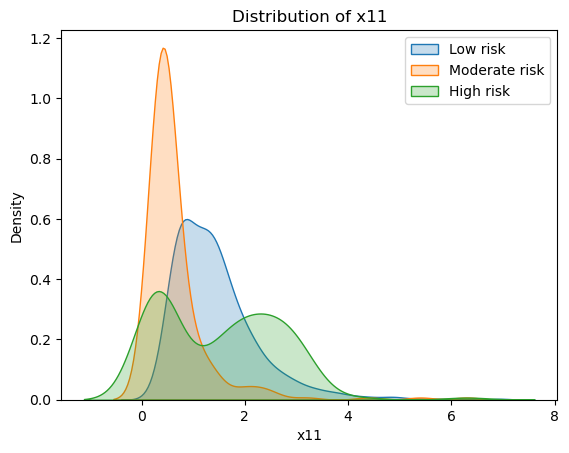

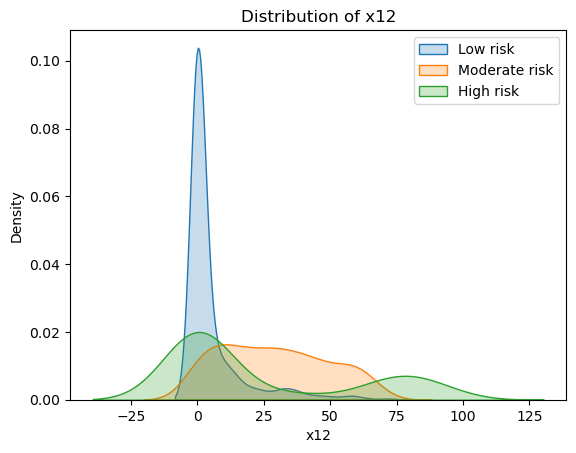

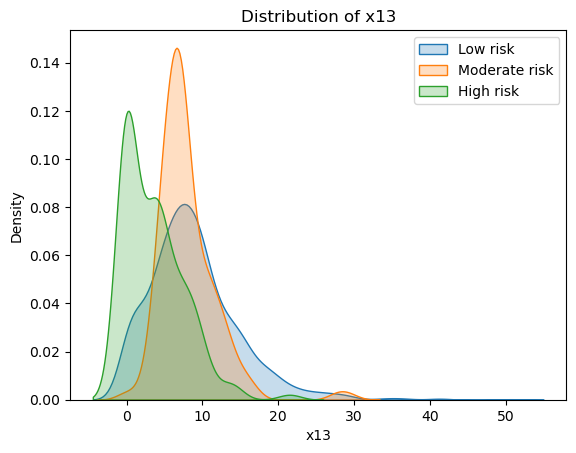

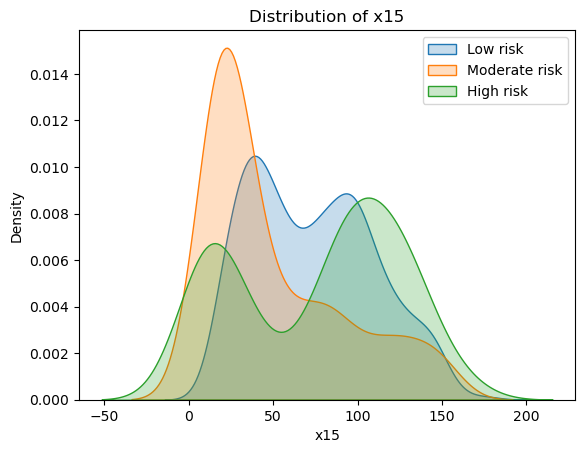

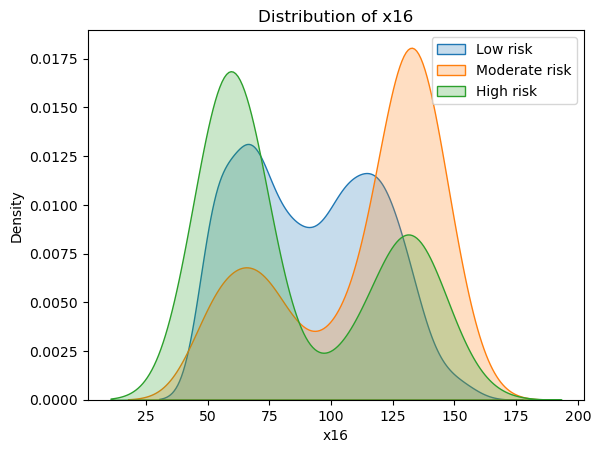

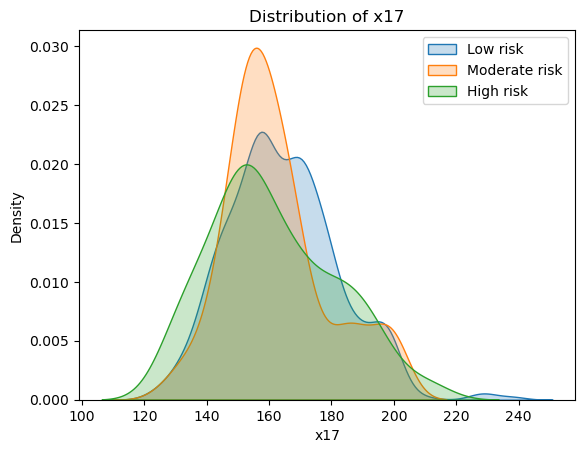

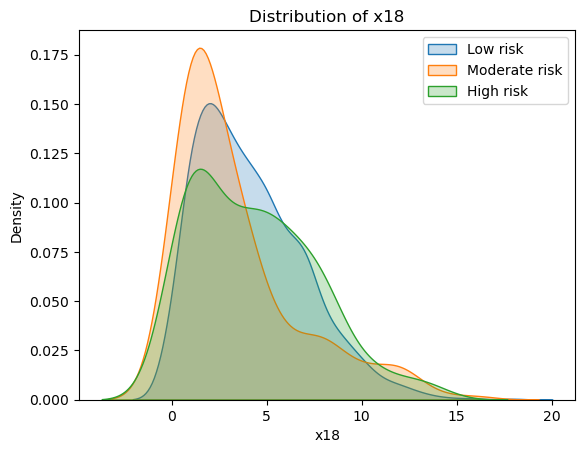

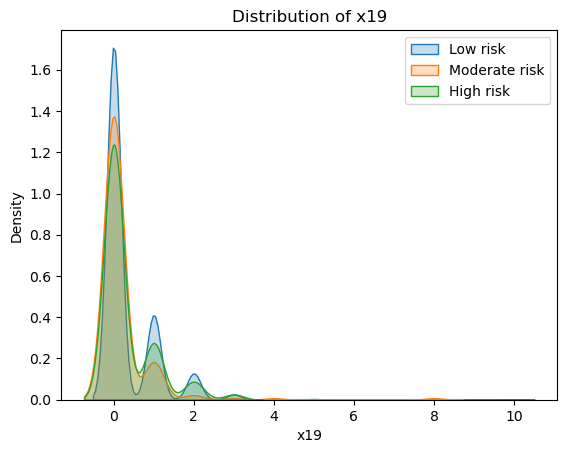

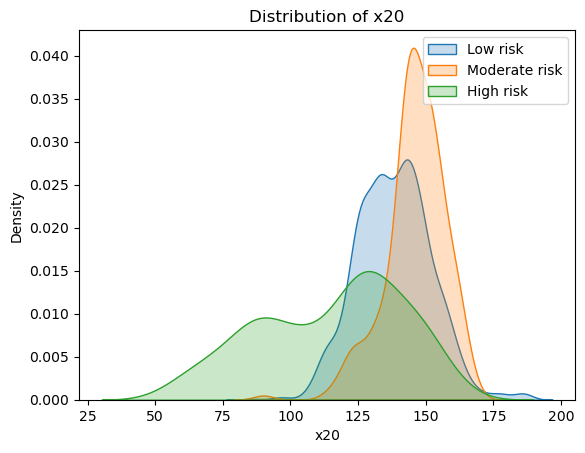

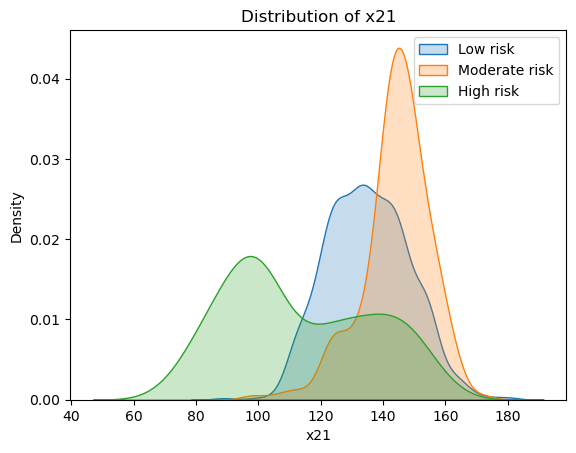

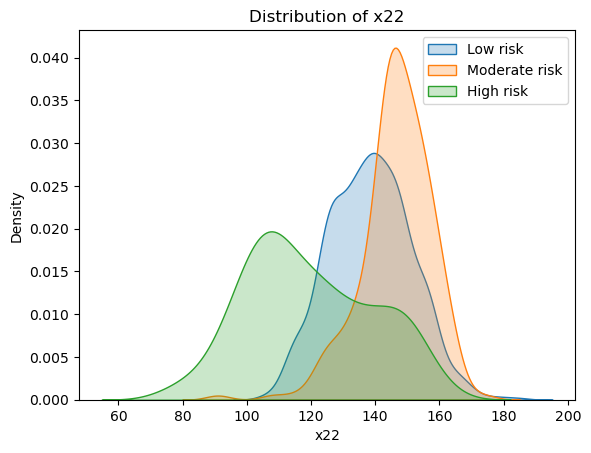

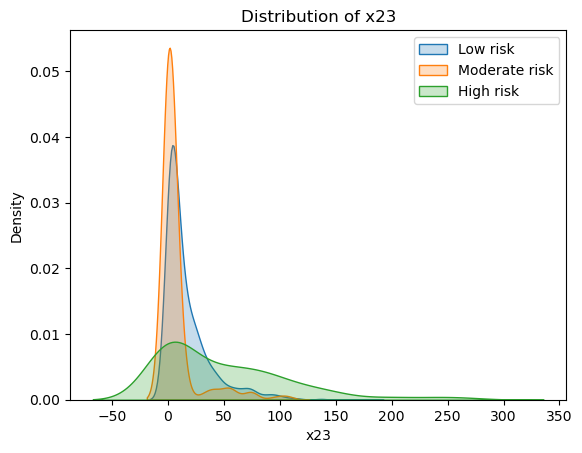

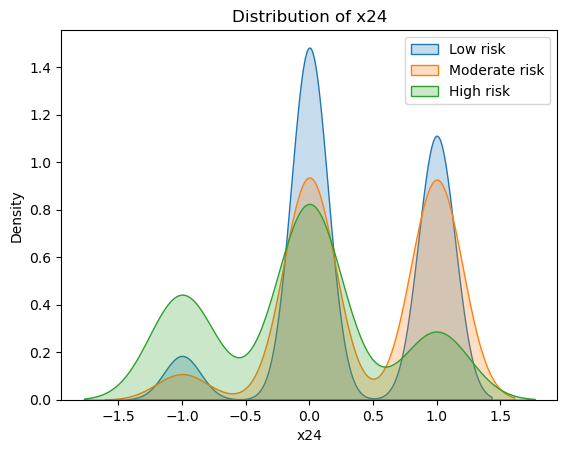

In [27]:
#KDE plots for the continous varibales of the data set
for column in CONTINUOUS_COLUMNS:
    plt.figure()
    
    sns.kdeplot(data=HealthTrain_data_LR[column],label="Low risk", shade=True)
    sns.kdeplot(data=HealthTrain_data_MR[column],label="Moderate risk", shade=True)
    sns.kdeplot(data=HealthTrain_data_HR[column],label="High risk", shade=True)
   
    plt.legend()
    
    plt.title("Distribution of " +column)
    
    plt.savefig(column+'.jpg')
    
   # plt.show()

C:\Users\JT\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\JT\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


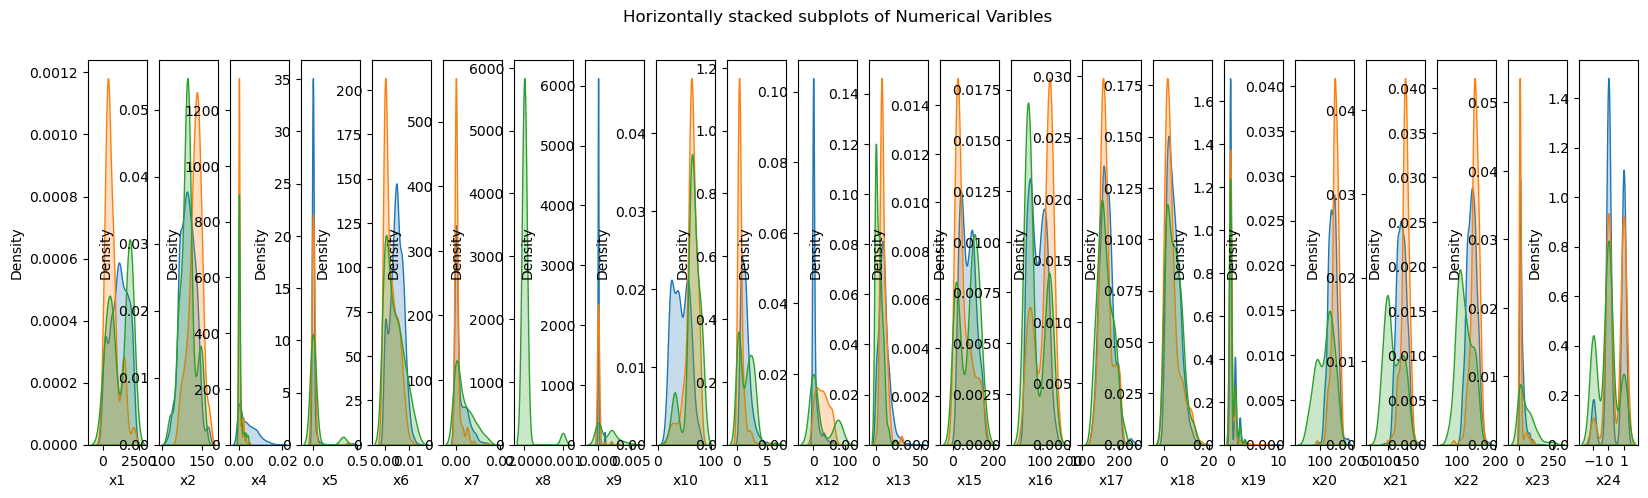

In [28]:
fig, (ax1) = plt.subplots(1,22, figsize=(20,5))
fig.suptitle('Horizontally stacked subplots of Numerical Varibles')


for i in range(len(CONTINUOUS_COLUMNS)):
    sns.kdeplot(data=HealthTrain_data_LR[CONTINUOUS_COLUMNS[i]],label="Low risk", shade=True,ax=ax1[i])
    sns.kdeplot(data=HealthTrain_data_MR[CONTINUOUS_COLUMNS[i]],label="Moderate risk", shade=True,ax=ax1[i])
    sns.kdeplot(data=HealthTrain_data_HR[CONTINUOUS_COLUMNS[i]],label="High risk", shade=True,ax=ax1[i])

plt.show()

C:\Users\JT\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\JT\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


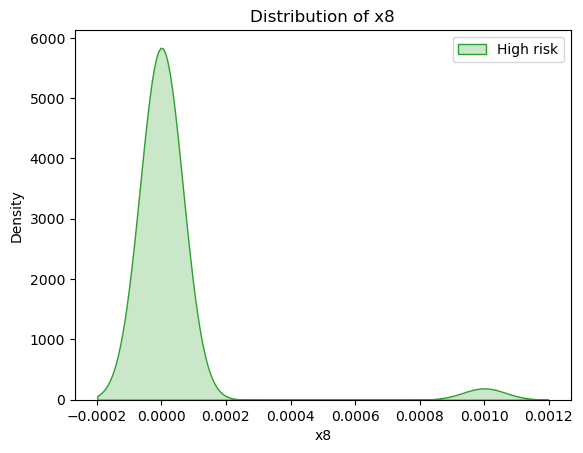

In [29]:
sns.kdeplot(data=HealthTrain_data_LR['x8'],label="Low risk", shade=True)
sns.kdeplot(data=HealthTrain_data_MR['x8'],label="Moderate risk", shade=True)
sns.kdeplot(data=HealthTrain_data_HR['x8'],label="High risk", shade=True)

plt.title("Distribution of x8")
plt.legend()

plt.savefig('x8_dis'+'.jpg')

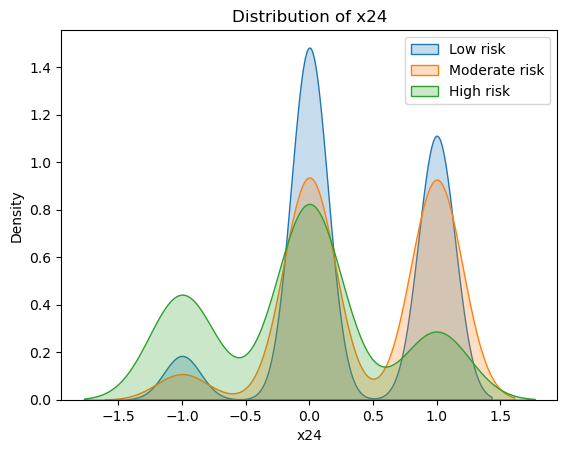

In [30]:
sns.kdeplot(data=HealthTrain_data_LR['x24'],label="Low risk", shade=True)
sns.kdeplot(data=HealthTrain_data_MR['x24'],label="Moderate risk", shade=True)
sns.kdeplot(data=HealthTrain_data_HR['x24'],label="High risk", shade=True)

plt.title("Distribution of x24")
plt.legend()

plt.savefig('x24_dis'+'.jpg')

In [31]:
for column in CATEGORICAL_COLUMNS:
    CategoricalD.loc['missing',column] = HealthTrain_data[column].isnull().sum()
    CategoricalD.loc['values',column] = HealthTrain_data[column].unique()

print(CategoricalD)


                                                        id      x3  \
count                                                 1584    1584   
unique                                                1584       2   
top                                                 PA1001       M   
freq                                                     1     842   
missing                                                  0       0   
values   [PA1001, PA1002, PA1003, PA1004, PA1005, PA100...  [F, M]   

                                        x14  
count                                  1584  
unique                                    8  
top                                      O+  
freq                                    410  
missing                                   0  
values   [O+, A+, B+, O-, A-, B-, AB-, AB+]  


<AxesSubplot:xlabel='x3', ylabel='count'>

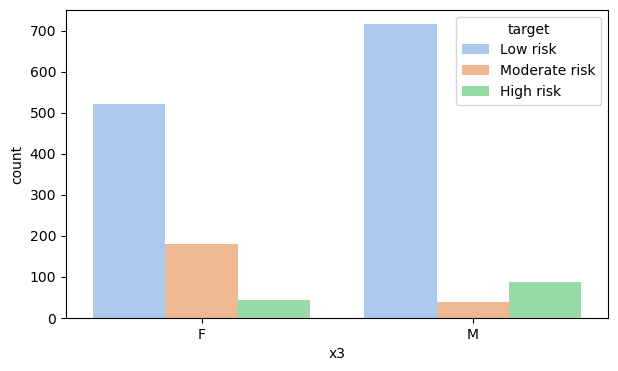

In [32]:
plt.figure(figsize=(7,4))
sns.countplot(x="x3", hue='target', palette="pastel", data=HealthTrain_data)


<AxesSubplot:xlabel='x14', ylabel='count'>

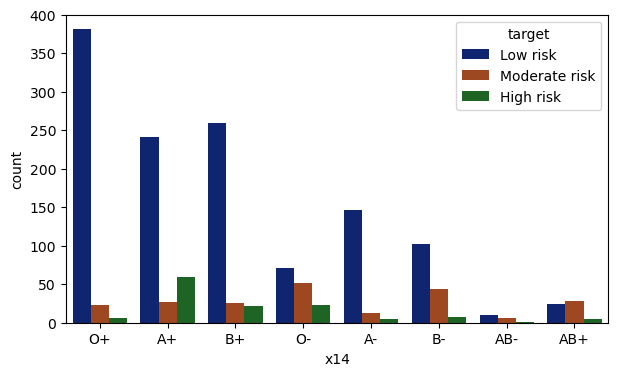

In [33]:
plt.figure(figsize=(7,4))
sns.countplot(x="x14", hue='target', palette="dark", data=HealthTrain_data)


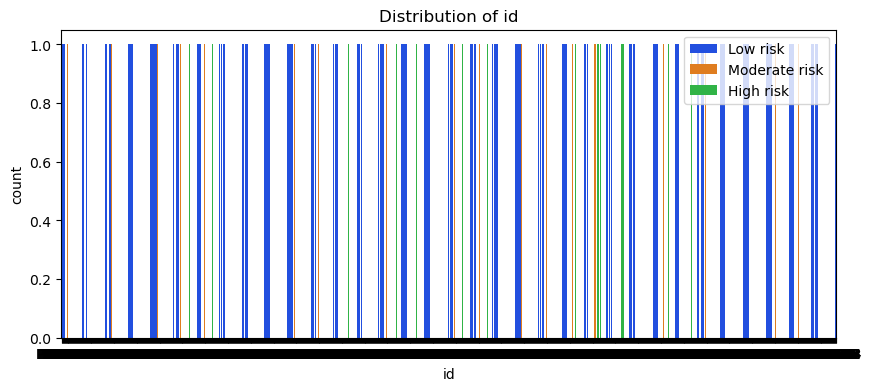

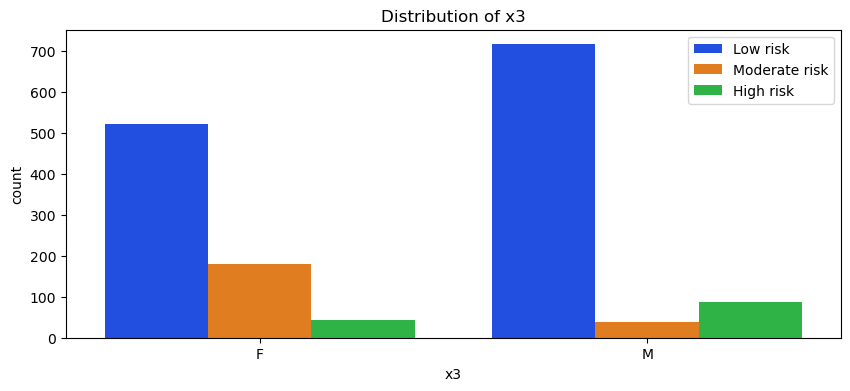

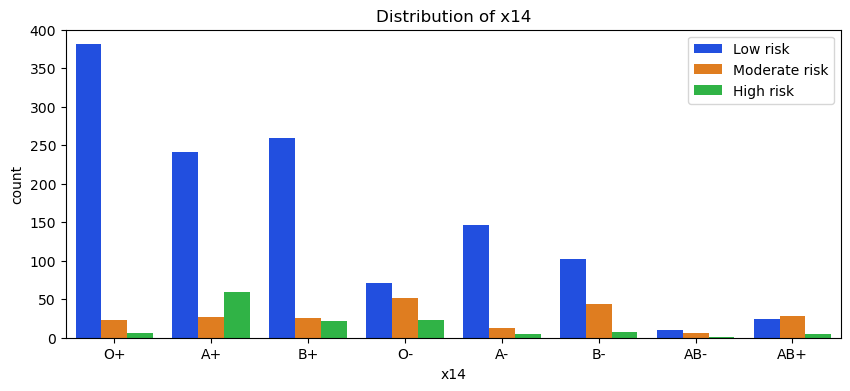

In [34]:
for column in CATEGORICAL_COLUMNS:
    plt.figure(figsize=(10,4))
    #plt.xticks(rotation=90) 
    sns.countplot(x=column, hue='target', palette="bright", data=HealthTrain_data)
    plt.legend()
    plt.title("Distribution of " +column)
    plt.savefig(column+'.jpg')

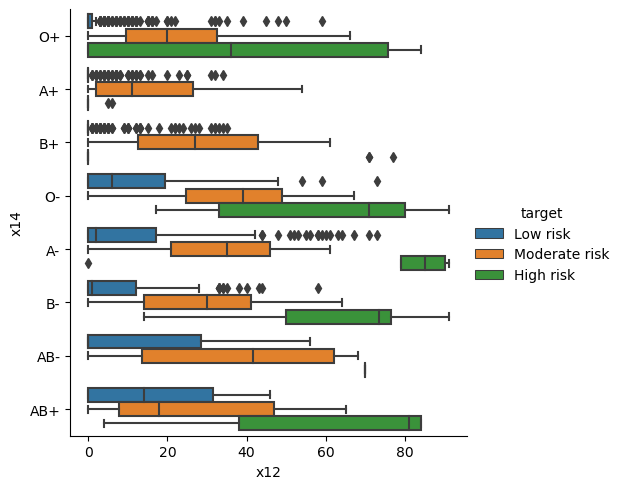

In [35]:
 sns.catplot(x="x12",y="x14", hue="target", kind="box", data=HealthTrain_data)

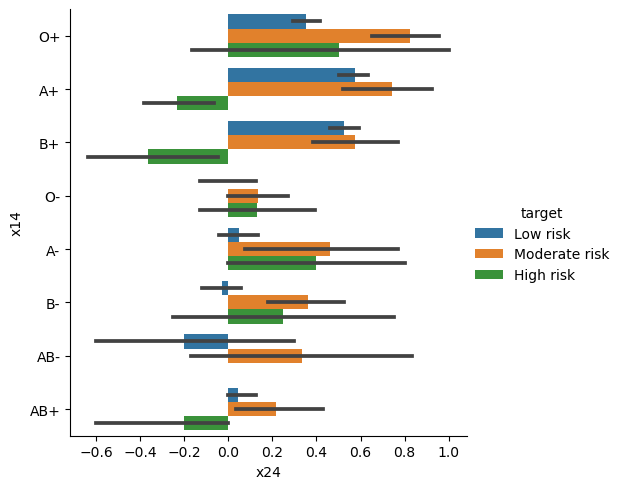

In [36]:
 sns.catplot(x="x24",y="x14", hue="target", kind="bar", data=HealthTrain_data)

<AxesSubplot:xlabel='x14', ylabel='x12'>

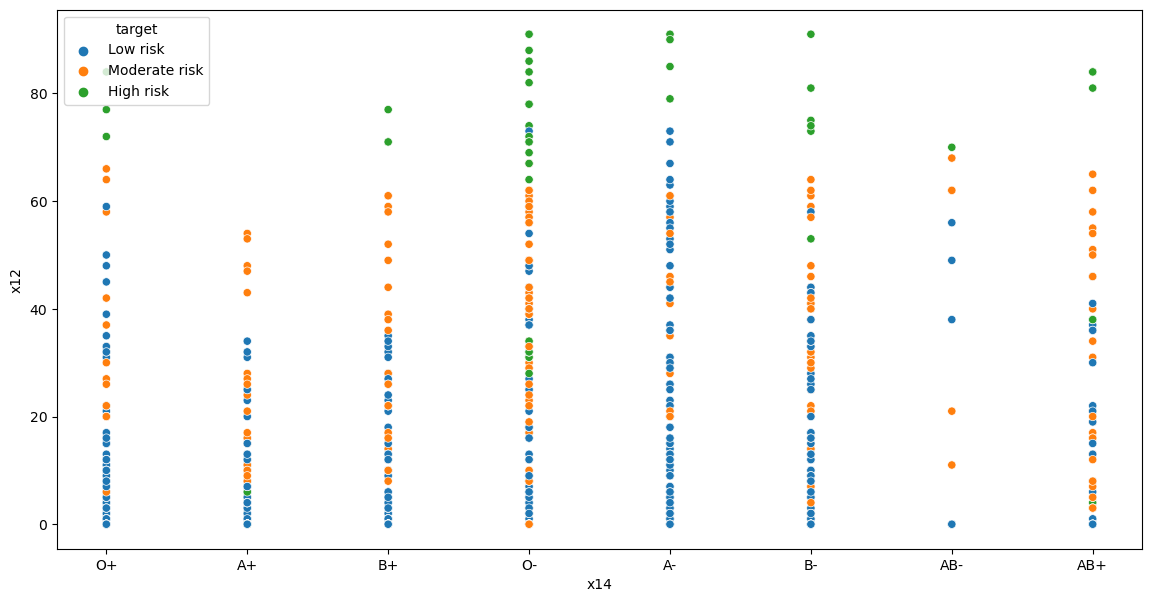

In [37]:
plt.figure(figsize=(14,7))

#sns.lmplot(x="x12", y="x24", hue="target", data=HealthTrain_data)
sns.scatterplot(x=HealthTrain_data['x14'], y=HealthTrain_data['x12'],hue=HealthTrain_data['target'])

<AxesSubplot:xlabel='x14', ylabel='x5'>

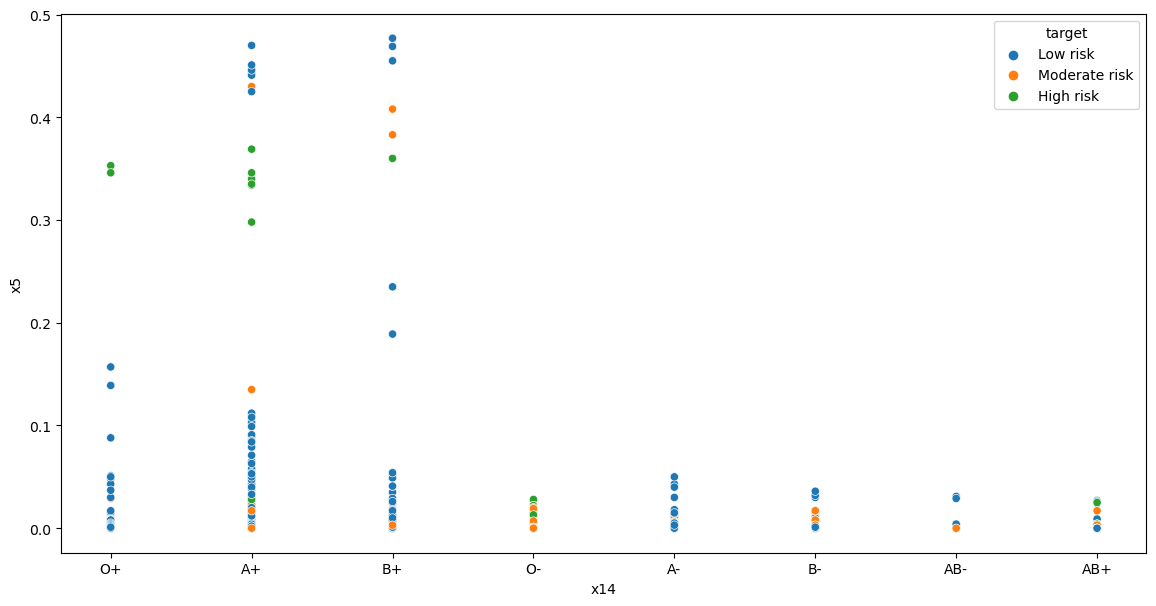

In [38]:
plt.figure(figsize=(14,7))

sns.scatterplot(x=HealthTrain_data['x14'], y=HealthTrain_data['x5'],hue=HealthTrain_data['target'])

In [39]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
print("Vis setup Complete")

Vis setup Complete


Distribution of the risk levels among the data set


<AxesSubplot:xlabel='target', ylabel='count'>

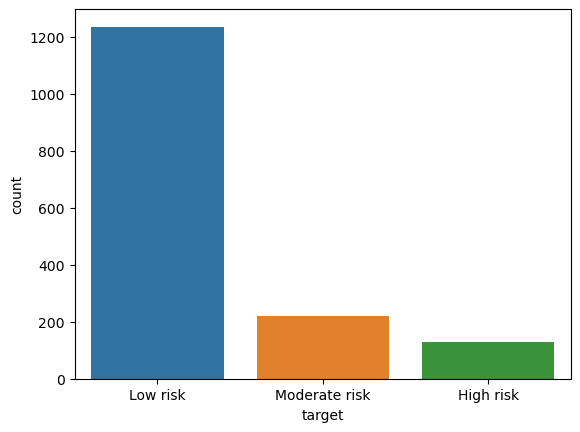

In [40]:
print("Distribution of the risk levels among the data set")
sns.countplot(x= 'target', data=HealthTrain_data)

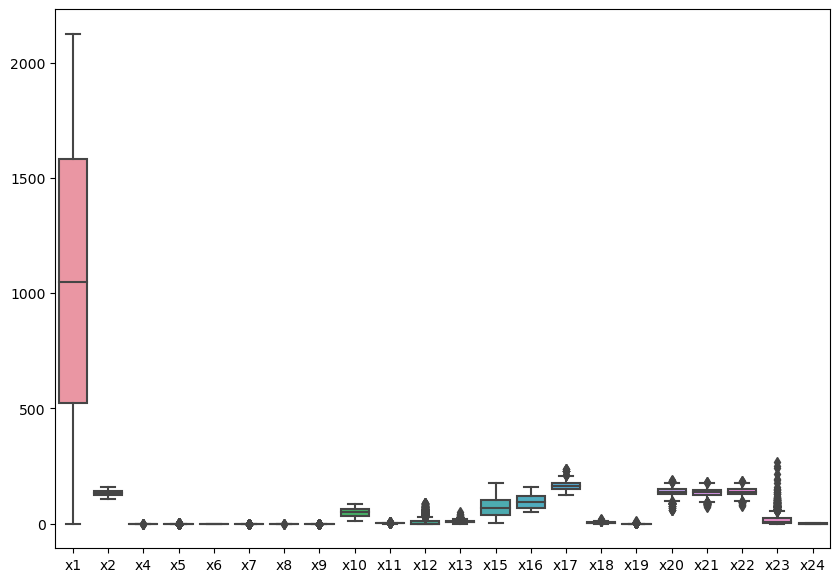

In [41]:
plt.figure(figsize=(10,7))
sns.boxplot(data=HealthTrain_data)
plt.show()

In [42]:
missing_v = HealthTrain_data.isnull()
missing_vcount = missing_v.sum()
pd.set_option('display.max_rows',None)
print("The sum of the counts of the missing values in each variable.")
print(missing_vcount)

The sum of the counts of the missing values in each variable.
id         0
x1         0
x2         0
x3         0
x4         0
x5        44
x6         0
x7         0
x8        17
x9         0
x10       27
x11        0
x12        0
x13        0
x14        0
x15        0
x16        0
x17        0
x18        0
x19        0
x20        0
x21        0
x22        0
x23        0
x24        0
target     0
dtype: int64


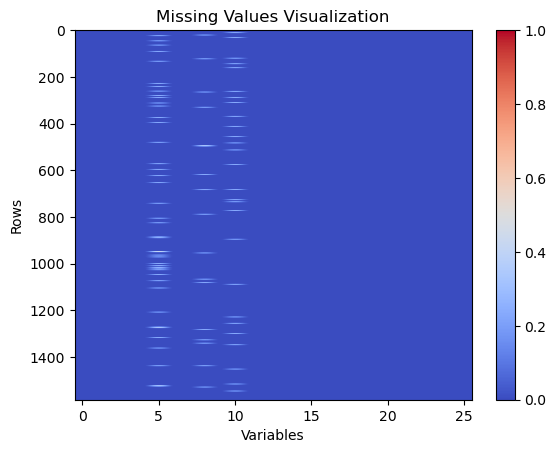

In [43]:
missing_v = HealthTrain_data.isnull()
plt.imshow(missing_v, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title('Missing Values Visualization')
plt.xlabel('Variables')
plt.ylabel('Rows')
plt.show()

In [44]:
pd.set_option('display.max_rows',10)
htrain= HealthTrain_data[CONTINUOUS_COLUMNS]
htrain_nomissingv = htrain.dropna()
print(htrain_nomissingv)

        x1     x2     x4     x5     x6     x7   x8     x9   x10  x11   x12  \
0     1406  145.0  0.005  0.000  0.002  0.000  0.0  0.000  46.0  0.8   0.0   
1      258  127.0  0.012  0.000  0.008  0.004  0.0  0.000  13.0  3.8   0.0   
2      479  145.0  0.000  0.000  0.000  0.002  0.0  0.000  57.0  0.5   0.0   
3      906  146.0  0.004  0.000  0.005  0.003  0.0  0.000  29.0  1.2   1.0   
4     1921  140.0  0.002  0.003  0.006  0.006  0.0  0.000  62.0  1.6   0.0   
...    ...    ...    ...    ...    ...    ...  ...    ...   ...  ...   ...   
1579  2077  130.0  0.005  0.001  0.001  0.000  0.0  0.000  72.0  0.9   8.0   
1580   664  138.0  0.000  0.003  0.003  0.000  0.0  0.002  60.0  1.0   8.0   
1581  1431  144.0  0.000  0.000  0.006  0.000  0.0  0.000  45.0  0.7   0.0   
1582   630  134.0  0.017  0.002  0.004  0.000  0.0  0.000  48.0  2.2   0.0   
1583   436  151.0  0.000  0.000  0.006  0.006  0.0  0.000  64.0  1.1  26.0   

      x13    x15    x16    x17   x18  x19    x20    x21    x22 

In [45]:
htrain= HealthTrain_data[CONTINUOUS_COLUMNS]
htrain.shape

(1584, 22)

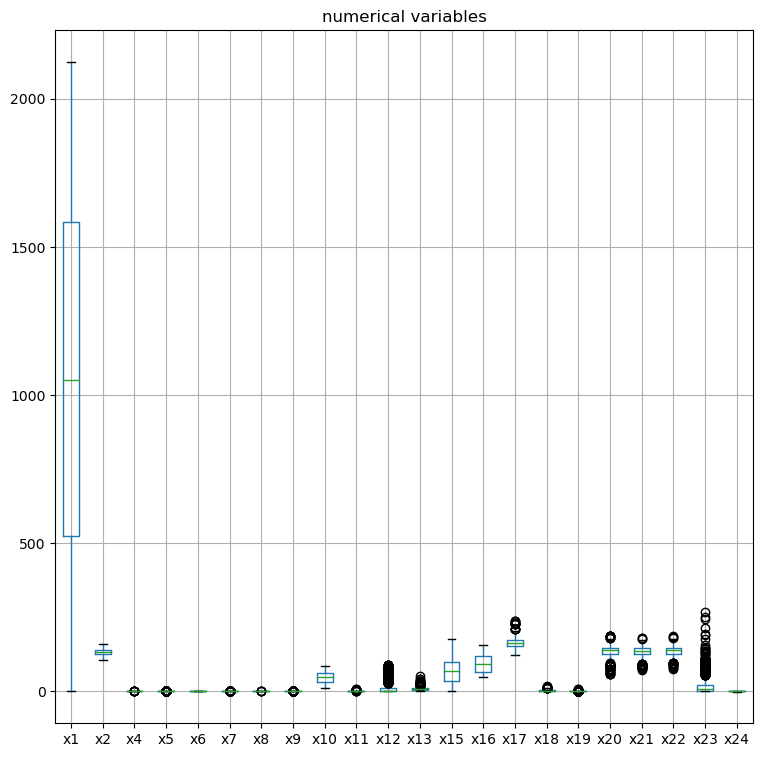

In [46]:
htrain.boxplot(figsize=(9,9))
plt.title('numerical variables')
plt.show()

In [47]:
print("Detecting Outliers using the Zscore method")

zscore = (htrain - htrain.mean())/ htrain.std()
threshold = 3
outliers_Mask = np.abs(zscore) > threshold
sum_outliers = outliers_Mask.sum()
pd.set_option('display.max_rows',None)
print("Sum number of outliers for each variable are:")
print(sum_outliers)

Detecting Outliers using the Zscore method
Sum number of outliers for each variable are:
x1      0
x2      0
x4     16
x5     24
x6      2
x7     31
x8      4
x9     79
x10     0
x11    25
x12    42
x13    24
x15     0
x16     0
x17    10
x18    16
x19    23
x20    27
x21    20
x22    13
x23    30
x24     0
dtype: int64


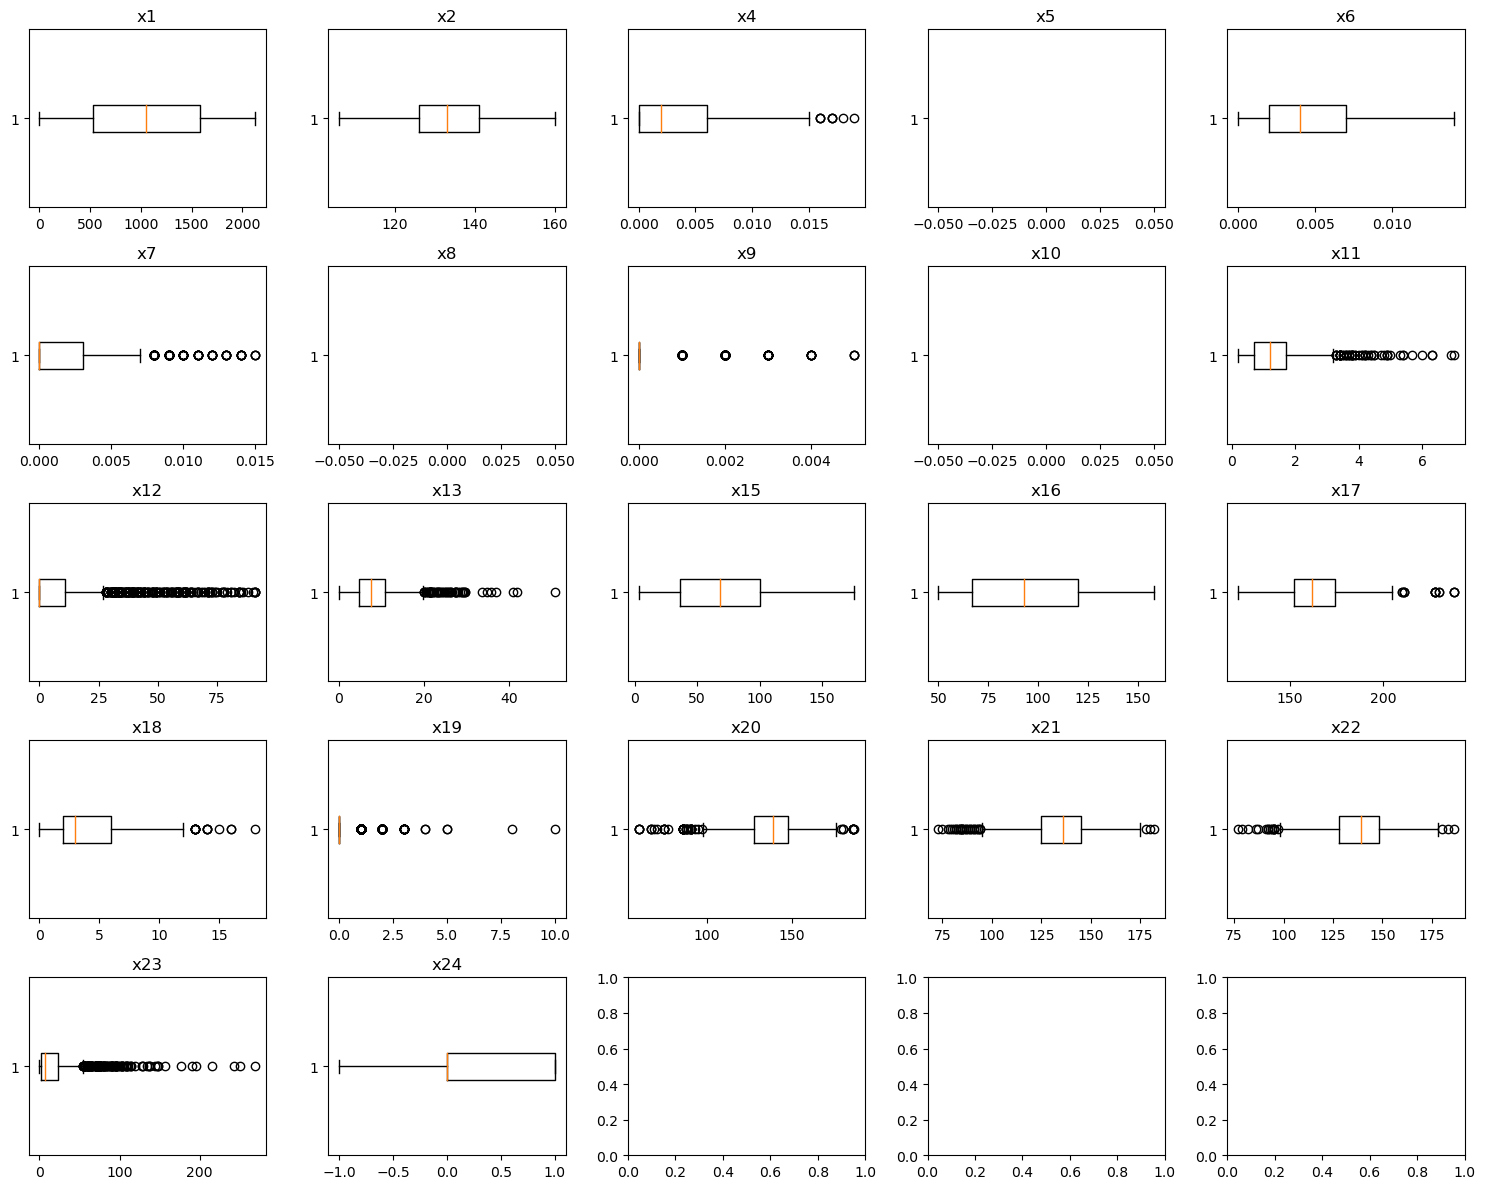

In [48]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(15, 12))
for i, col in enumerate(htrain.columns):
    ax = axs[i // 5, i % 5]  # Get the corresponding axis
    ax.boxplot(htrain[col], vert=False)
    ax.set_title(col)
plt.tight_layout()
plt.show()

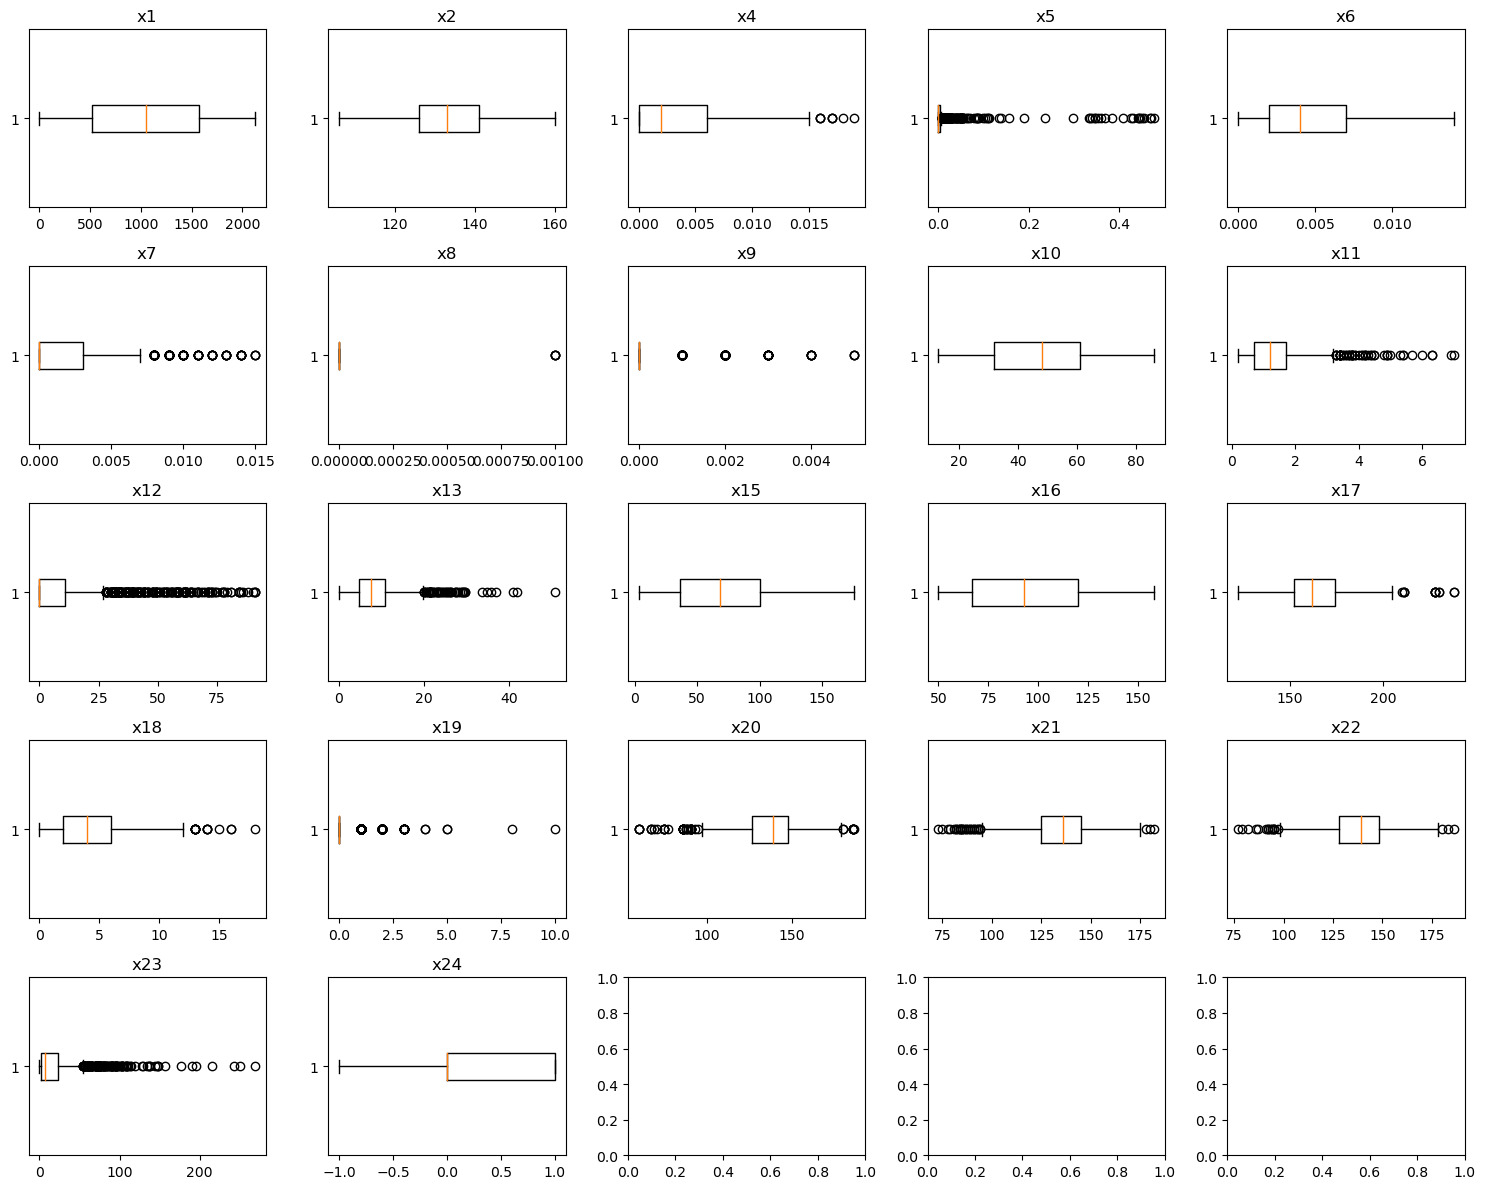

In [49]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(15, 12))
for i, col in enumerate(htrain_nomissingv.columns):
    ax = axs[i // 5, i % 5]  # Get the corresponding axis
    ax.boxplot(htrain_nomissingv[col], vert=False)
    ax.set_title(col)
plt.tight_layout()
plt.show()

In [50]:
print("Filtering to ensure only those rows that are not outliers are retained in a new data frame for further coding")

zscores = np.abs((htrain - htrain.mean())/ htrain.std())
threshold = 3

masked_data = zscores[~zscores.isnull()].lt(threshold).all(axis=1)

filtered_data = htrain[masked_data]
print(filtered_data.shape)

Filtering to ensure only those rows that are not outliers are retained in a new data frame for further coding
(1251, 22)


In [51]:
print("Filtering to ensure only those rows that are not outliers & missing values are retained in a new data frame for further coding")

zscores = np.abs((htrain_nomissingv - htrain_nomissingv.mean())/ htrain_nomissingv.std())
threshold = 3

masked_datanomissingv = zscores[~zscores.isnull()].lt(threshold).all(axis=1)

filtered_datanomissingv = htrain_nomissingv[masked_datanomissingv]
print(filtered_datanomissingv.shape)

Filtering to ensure only those rows that are not outliers & missing values are retained in a new data frame for further coding
(1252, 22)


In [52]:
deduplicated_filtered_data = filtered_data.drop_duplicates()
print(deduplicated_filtered_data.shape)

(1251, 22)


In [53]:
pd.set_option('display.max_rows',10)
pd.set_option('display.max_columns',None)

print(deduplicated_filtered_data)

        x1     x2     x4     x5     x6     x7   x8   x9   x10  x11   x12  \
0     1406  145.0  0.005  0.000  0.002  0.000  0.0  0.0  46.0  0.8   0.0   
1      258  127.0  0.012  0.000  0.008  0.004  0.0  0.0  13.0  3.8   0.0   
2      479  145.0  0.000  0.000  0.000  0.002  0.0  0.0  57.0  0.5   0.0   
3      906  146.0  0.004  0.000  0.005  0.003  0.0  0.0  29.0  1.2   1.0   
5       70  144.0  0.001  0.000  0.005  0.000  0.0  0.0  45.0  0.8   2.0   
...    ...    ...    ...    ...    ...    ...  ...  ...   ...  ...   ...   
1577  1234  125.0  0.002  0.000  0.004  0.001  0.0  0.0  30.0  1.1   3.0   
1578  1731  134.0  0.008  0.001  0.010  0.006  0.0  0.0  61.0  1.1   0.0   
1579  2077  130.0  0.005  0.001  0.001  0.000  0.0  0.0  72.0  0.9   8.0   
1581  1431  144.0  0.000  0.000  0.006  0.000  0.0  0.0  45.0  0.7   0.0   
1583   436  151.0  0.000  0.000  0.006  0.006  0.0  0.0  64.0  1.1  26.0   

       x13    x15    x16    x17   x18  x19    x20    x21    x22   x23  x24  
0      8.6

In [54]:
print("Preprocessing")

Preprocessing


In [55]:
for col in HealthTrain_data[CATEGORICAL_COLUMNS]:
    print ("---- %s ---" % col)
    print (HealthTrain_data[col].value_counts())

---- id ---
PA1001    1
PA2065    1
PA2063    1
PA2062    1
PA2061    1
         ..
PA1526    1
PA1525    1
PA1524    1
PA1523    1
PA2584    1
Name: id, Length: 1584, dtype: int64
---- x3 ---
M    842
F    742
Name: x3, dtype: int64
---- x14 ---
O+     410
A+     328
B+     307
A-     165
B-     154
O-     146
AB+     57
AB-     17
Name: x14, dtype: int64


In [56]:
for col in deduplicated_filtered_data:
    print ("---- %s ---" % col)
    print (deduplicated_filtered_data[col].value_counts())

---- x1 ---
1406    1
886     1
4       1
264     1
1545    1
       ..
1786    1
2007    1
927     1
1496    1
436     1
Name: x1, Length: 1251, dtype: int64
---- x2 ---
122.0    77
125.0    62
138.0    61
133.0    60
130.0    57
         ..
154.0     4
116.0     3
160.0     1
156.0     1
117.0     1
Name: x2, Length: 48, dtype: int64
---- x4 ---
0.000    496
0.003    101
0.002     96
0.001     79
0.004     77
        ... 
0.010     29
0.011     27
0.013     16
0.012     14
0.014     10
Name: x4, Length: 15, dtype: int64
---- x5 ---
0.000    812
0.001     96
0.002     54
0.003     54
0.004     35
        ... 
0.028      1
0.079      1
0.065      1
0.024      1
0.053      1
Name: x5, Length: 55, dtype: int64
---- x6 ---
0.000    197
0.005    184
0.004    152
0.007    133
0.006    124
        ... 
0.009     48
0.010     23
0.011      6
0.012      4
0.013      1
Name: x6, Length: 14, dtype: int64
---- x7 ---
0.000    786
0.001     98
0.002     65
0.005     64
0.003     63
        ... 
0.

In [57]:
for col in HealthTrain_data[CONTINUOUS_COLUMNS]:
    print ("---- %s ---" % col)
    print (HealthTrain_data[col].value_counts())

---- x1 ---
1406    1
1495    1
183     1
1240    1
1625    1
       ..
333     1
1786    1
2007    1
927     1
436     1
Name: x1, Length: 1584, dtype: int64
---- x2 ---
133.0    97
122.0    87
130.0    79
138.0    75
125.0    67
         ..
157.0     4
116.0     4
156.0     3
160.0     1
117.0     1
Name: x2, Length: 48, dtype: int64
---- x4 ---
0.000    662
0.003    127
0.002    116
0.001    105
0.004     92
        ... 
0.015      8
0.017      3
0.016      3
0.019      1
0.018      1
Name: x4, Length: 20, dtype: int64
---- x5 ---
0.000    959
0.001    120
0.002     73
0.003     67
0.004     36
        ... 
0.451      1
0.430      1
0.065      1
0.425      1
0.088      1
Name: x5, Length: 90, dtype: int64
---- x6 ---
0.000    249
0.005    228
0.004    187
0.007    158
0.003    157
        ... 
0.010     35
0.011     11
0.012     10
0.013      2
0.014      2
Name: x6, Length: 15, dtype: int64
---- x7 ---
0.000    923
0.001    120
0.003     92
0.002     87
0.005     85
        ... 
0.

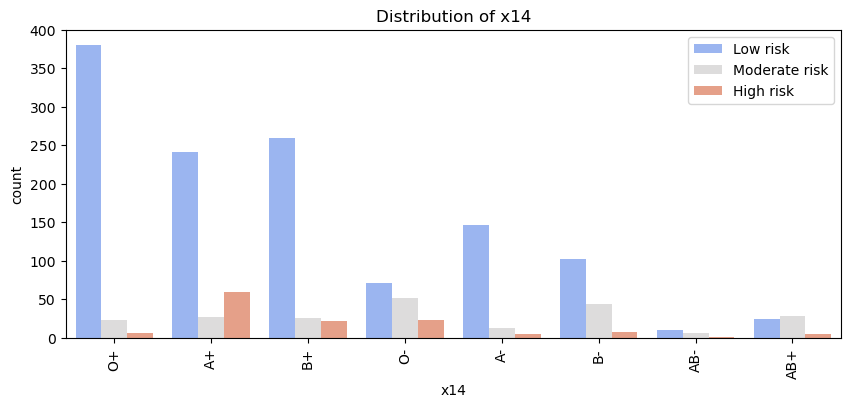

In [58]:
def DistPlot(df,hue,column):
  
    plt.figure(figsize=(10,4))
    plt.xticks(rotation=90) 

    sns.countplot(x=column, hue=hue,palette="coolwarm", data=df)

    plt.title("Distribution of " +column)
 
    plt.legend()
    return
DistPlot(HealthTrain_data,'target','x14')

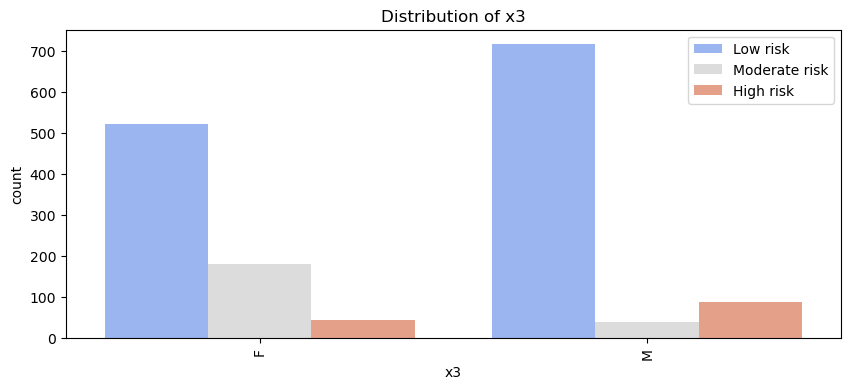

In [59]:
def DistPlot(df,hue,column):
   
    plt.figure(figsize=(10,4))
    plt.xticks(rotation=90) 
    
    sns.countplot(x=column, hue=hue,palette="coolwarm", data=df)
    plt.title("Distribution of " +column)
    plt.legend()
    return
DistPlot(HealthTrain_data,'target','x3')

In [60]:
HealthTrain_data["x3"] = np.where(HealthTrain_data["x3"].str.contains("F"), 1, 0)
print(HealthTrain_data['x3'].dtypes)

int32


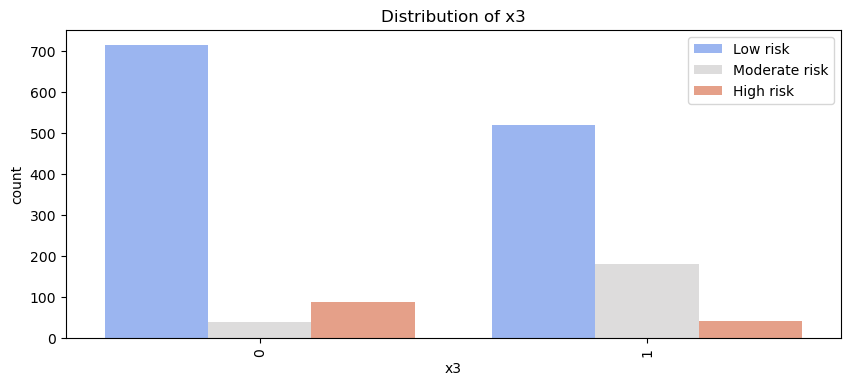

In [61]:
DistPlot(HealthTrain_data,'target','x3')

<AxesSubplot:xlabel='x12', ylabel='x24'>

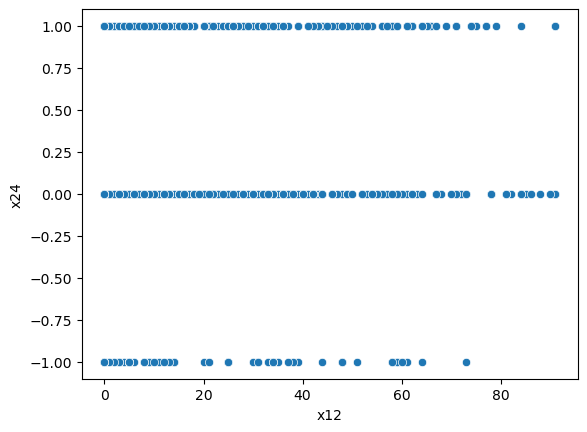

In [62]:
sns.scatterplot(x=HealthTrain_data['x12'], y=HealthTrain_data['x24'])

In [63]:
HealthTrain_data.select_dtypes(include=['object']).columns


Index(['id', 'x14', 'target'], dtype='object')

In [98]:
!pip install category_encoders

import category_encoders as ce
enc = ce.OrdinalEncoder(cols=['id','x3', 'x14'],handle_missing='return_nan',return_df= True)

X=enc.fit_transform(HealthTrain_data)
type(X)

pandas.core.frame.DataFrame

In [99]:
X.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,target
0,1.0,1406,145.0,1.0,0.005,0.000,0.002,0.000,0.0,0.0,46.0,0.8,0.0,8.6,1.0,67.0,104.0,171.0,4.0,0.0,155.0,153.0,154.0,4.0,1.0,Low risk
1,2.0,258,127.0,2.0,0.012,0.000,0.008,0.004,0.0,0.0,13.0,3.8,0.0,1.3,2.0,138.0,53.0,191.0,12.0,1.0,133.0,126.0,131.0,41.0,0.0,Low risk
2,3.0,479,145.0,1.0,0.000,0.000,0.000,0.002,0.0,0.0,57.0,0.5,0.0,7.3,1.0,46.0,111.0,157.0,1.0,1.0,150.0,146.0,149.0,6.0,1.0,Low risk
3,4.0,906,146.0,1.0,0.004,0.000,0.005,0.003,0.0,0.0,29.0,1.2,1.0,7.0,1.0,62.0,107.0,169.0,2.0,2.0,150.0,147.0,149.0,7.0,0.0,Low risk
4,5.0,1921,140.0,1.0,0.002,0.003,0.006,0.006,0.0,0.0,62.0,1.6,0.0,9.1,3.0,153.0,75.0,228.0,9.0,0.0,142.0,118.0,142.0,20.0,0.0,Low risk


In [66]:
print("Feature selection")
objnum_df = X.select_dtypes(exclude=['object']).copy()
FS_Colsnum=objnum_df.columns
FS_Colsnum

Feature selection


Index(['id', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24'],
      dtype='object')

In [67]:
X1=X[FS_Colsnum]
y=X.target

In [68]:
print("Correlation in variables")
correlated_v = X1.corr()
correlated_v

Correlation in variables


,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24
id,1.000000,0.029566,0.031876,-0.041106,0.027292,-0.041190,0.029051,-0.012578,0.006168,-0.020131,0.040984,-0.037858,0.015674,-0.031959,0.017125,-0.009603,0.034864,0.036703,-0.014020,-0.028469,0.040581,0.035536,0.047157,0.008057,-0.031305
x1,0.029566,1.000000,-0.140849,0.065654,0.064611,-0.171225,0.441475,0.290645,0.054606,0.160610,0.141690,0.123397,-0.218873,-0.316328,-0.062672,-0.034931,0.016311,-0.049105,-0.028743,-0.027576,-0.186488,-0.281965,-0.199382,0.153051,-0.154393
x2,0.031876,-0.140849,1.000000,-0.816558,-0.064462,-0.036019,-0.141572,-0.161659,-0.048030,-0.107664,0.313653,-0.275446,0.276581,-0.033334,0.410054,-0.123930,0.349450,0.307608,-0.098621,-0.003442,0.716999,0.730456,0.794640,-0.125936,0.287434
x3,-0.041106,0.065654,-0.816558,1.000000,0.030652,0.131673,0.149680,0.174493,0.047244,0.142323,-0.317180,0.306515,-0.233389,0.006101,-0.330656,0.127566,-0.321904,-0.254173,0.118956,0.006650,-0.609279,-0.642774,-0.686039,0.176244,-0.245493
x4,0.027292,0.064611,-0.064462,0.030652,1.000000,0.035747,0.083795,-0.111122,-0.042002,-0.123082,-0.282130,0.204907,-0.380133,-0.117809,-0.105601,0.300302,-0.147888,0.409489,0.202866,-0.003213,0.253762,0.279833,0.279454,0.132532,0.045396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x20,0.040581,-0.186488,0.716999,-0.609279,0.253762,-0.063722,-0.107098,-0.355754,-0.191844,-0.431633,0.075051,-0.304893,0.156685,0.077902,0.300408,-0.138368,0.344051,0.267251,-0.098188,-0.047142,1.000000,0.896618,0.934683,-0.297319,0.412951
x21,0.035536,-0.281965,0.730456,-0.642774,0.279833,-0.099306,-0.191931,-0.522467,-0.142918,-0.489333,0.090029,-0.435390,0.212512,0.139702,0.381483,-0.258080,0.473544,0.220574,-0.202156,-0.068363,0.896618,1.000000,0.950510,-0.390207,0.330283
x22,0.047157,-0.199382,0.794640,-0.686039,0.279454,-0.077966,-0.145553,-0.390918,-0.143435,-0.450616,0.136198,-0.333253,0.178859,0.069769,0.356017,-0.152112,0.393444,0.318945,-0.113037,-0.039798,0.934683,0.950510,1.000000,-0.294820,0.389421
x23,0.008057,0.153051,-0.125936,0.176244,0.132532,0.204304,0.229555,0.554405,0.124649,0.508488,-0.149117,0.549538,-0.280306,-0.150921,-0.272176,0.608519,-0.539875,0.432849,0.459140,0.189649,-0.297319,-0.390207,-0.294820,1.000000,-0.082045


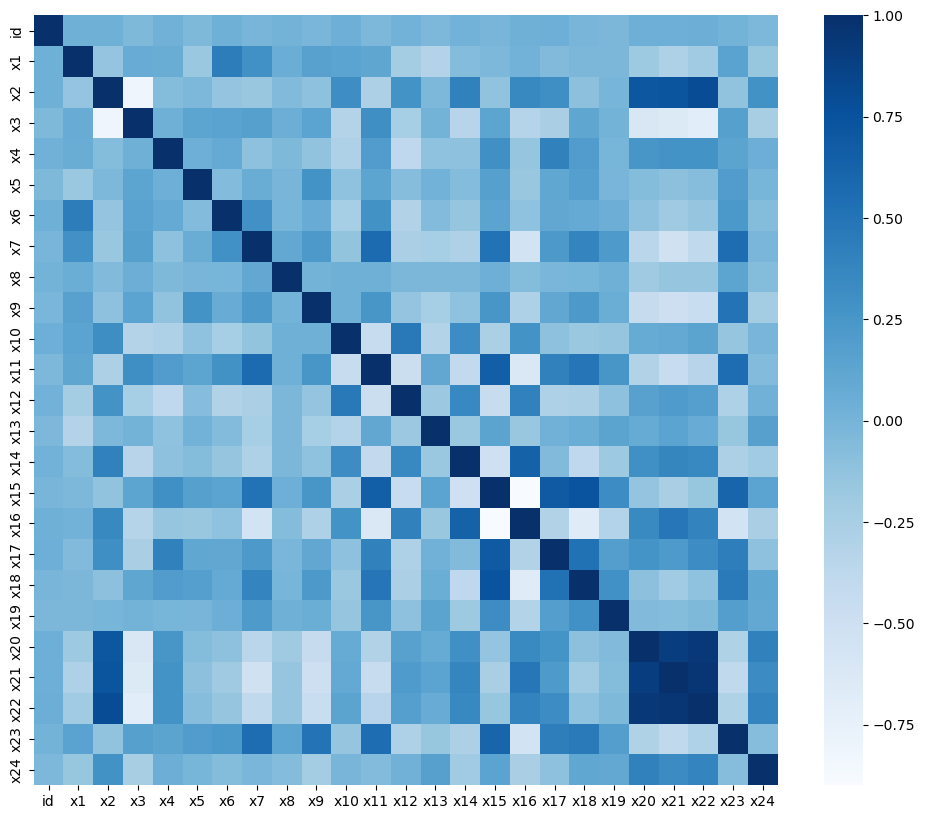

In [69]:
plt.figure(figsize=(12,10))
sns.heatmap(correlated_v, annot=False, cmap=plt.cm.Blues)
plt.show()

In [102]:
print("Spliting the data into training set and validation set.")

from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y= train_test_split (X,y, test_size=0.2,random_state=1)

print("Train set description \n", train_X.describe())

print("Validation set description \n",val_X.describe())




Spliting the data into training set and validation set.
Train set description 
                 id           x1           x2           x3           x4  \
count  1267.000000  1267.000000  1267.000000  1267.000000  1267.000000   
mean    789.262036  1063.404893   133.053670     1.540647     0.003197   
std     457.381484   617.024162    10.083159     0.498542     0.003841   
min       1.000000     0.000000   106.000000     1.000000     0.000000   
25%     391.500000   543.500000   125.000000     1.000000     0.000000   
50%     789.000000  1069.000000   133.000000     2.000000     0.002000   
75%    1188.500000  1598.500000   140.000000     2.000000     0.006000   
max    1584.000000  2125.000000   160.000000     2.000000     0.019000   

                x5           x6           x7           x8           x9  \
count  1238.000000  1267.000000  1267.000000  1255.000000  1267.000000   
mean      0.010211     0.004430     0.001878     0.000003     0.000160   
std       0.049419     0.002909

In [71]:
train_y.value_counts()

Low risk         998
Moderate risk    170
High risk         99
Name: target, dtype: int64

In [72]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

labelencoder = LabelEncoder()
one_hencoder = OneHotEncoder()

train_y_encoded = labelencoder.fit_transform(train_y)
train_X_encoded = one_hencoder.fit_transform(train_X)


Classifiersvc = LinearSVC()
Classifiersvc.fit(train_X_encoded, train_y_encoded);


In [73]:
print("LinearSVC Impletented \n",Classifiersvc)

LinearSVC Impletented 
 LinearSVC()


In [74]:
np.set_printoptions(threshold=np.inf)
y_predict = Classifiersvc.predict(train_X_encoded)
print(y_predict)


[1 1 1 2 2 1 1 1 1 2 1 1 2 1 1 2 1 2 1 1 1 1 0 1 1 1 1 0 2 1 1 2 1 1 1 1 1
 1 1 2 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1 1 1 1
 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 2 1 1 0 0 1 1 1 1 1 1 1 0 1 2 1 2 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 1 2
 1 2 1 2 1 1 0 1 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 2 1 1 2 2 0 1 1 1 1 2 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 2 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1
 2 2 1 1 2 1 1 1 1 1 1 0 1 1 0 1 1 1 2 1 1 1 1 1 2 1 1 1 0 1 1 2 2 1 1 1 1
 1 2 1 1 1 1 0 1 1 1 2 1 1 0 1 2 1 1 1 1 1 0 1 0 1 1 1 1 0 2 1 1 1 1 2 1 1
 1 1 1 1 1 1 2 0 1 1 0 1 1 2 1 1 1 1 2 2 1 0 1 1 1 2 1 1 1 1 2 2 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2
 2 1 2 2 1 1 1 1 1 1 1 1 0 1 1 1 2 2 1 1 1 1 0 1 2 1 1 1 1 0 1 2 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 

In [75]:
from sklearn.naive_bayes import GaussianNB

naivebayes = GaussianNB()
naivebayes.fit(train_X_encoded.toarray(), train_y_encoded);

In [76]:
print("NaiveBayes classifier Implemented \n",naivebayes)

NaiveBayes classifier Implemented 
 GaussianNB()


In [77]:
print("Creating KNN Classifier")

Creating KNN Classifier


In [78]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import *
from sklearn.utils.validation import check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics.pairwise import euclidean_distances

class KNN(BaseEstimator, ClassifierMixin):
    def __init__(self):
        pass

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.classes_ = unique_labels(y)
        self._X = X
        self._y = y
        return self

    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        closest = np.argmin(euclidean_distances(X, self._X), axis=1)
        return self._y[closest]
Classifier_KNN = KNN()
Classifier_KNN.fit(train_X_encoded.toarray(), train_y_encoded);
print("KNN implemented, when k=1 \n", Classifier_KNN)

KNN implemented, when k=1 
 KNN()


In [79]:
from sklearn.metrics import accuracy_score

classifiers = [Classifiersvc, naivebayes, Classifier_KNN]


scores = [accuracy_score(clf.predict(train_X_encoded.toarray()), train_y_encoded) for clf in classifiers]
    
index = np.argmax(scores)

print(scores)

print(classifiers[index])
print(scores[index])

[1.0, 1.0, 1.0]
LinearSVC()
1.0


In [80]:

y_svc = Classifiersvc.predict(train_X_encoded)

accuracy = accuracy_score(train_y_encoded, y_svc)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 100.00%


In [81]:
print(val_X)

          id    x1     x2   x3     x4     x5     x6     x7   x8   x9   x10  \
1298  1299.0   726  129.0  2.0  0.000  0.008  0.002  0.000  0.0  0.0  55.0   
654    655.0  1206  136.0  1.0  0.005  0.000  0.006  0.000  0.0  0.0  46.0   
572    573.0  1966  138.0  1.0  0.011    NaN  0.005  0.000  0.0  0.0  57.0   
1132  1133.0   935  126.0  2.0  0.003  0.000  0.005  0.001  0.0  0.0  30.0   
628    629.0   884  136.0  1.0  0.001  0.000  0.004  0.000  0.0  0.0  39.0   
...      ...   ...    ...  ...    ...    ...    ...    ...  ...  ...   ...   
1289  1290.0   691  133.0  2.0  0.007  0.455  0.003  0.003  0.0  0.0  25.0   
1196  1197.0   376  141.0  1.0  0.005  0.023  0.002  0.001  0.0  0.0  53.0   
1184  1185.0  1548  149.0  1.0  0.000  0.000  0.007  0.000  0.0  0.0  62.0   
321    322.0   522  158.0  1.0  0.008  0.027  0.002  0.000  0.0  0.0  41.0   
56      57.0  1110  122.0  2.0  0.005  0.000  0.000  0.000  0.0  0.0  20.0   

      x11   x12   x13  x14    x15    x16    x17   x18  x19    x

In [110]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack,csr_matrix


labelencoder = LabelEncoder()
one_hencoder = OneHotEncoder()

val_y_encoded = labelencoder.fit_transform(val_y)
val_X_encoded = one_hencoder.fit_transform(val_X)

if val_X_encoded.shape[1] != train_X_encoded.shape[1]:
    train_columns = train_X_encoded.shape[1]
    val_columns = val_X_encoded.shape[1]
    
    if val_columns < train_columns:
        missing_columns = train_columns - val_columns
        missing_columns_num = [f'missing_feature_{i}' for i in range(missing_columns)]
        val_X_encoded = hstack([val_X_encoded, csr_matrix((val_X_encoded.shape[0], missing_columns))], format='csr')

predictions_Valset = Classifiersvc.predict(val_X_encoded)
print(predictions_Valset)

accuracy = accuracy_score(val_y_encoded, predictions_Valset)
print("Accuracy: {:.2f}%".format(accuracy * 100))

[1 2 0 1 0 2 0 1 1 2 2 2 2 2 2 2 1 0 2 2 2 2 1 1 1 2 1 0 2 0 0 2 2 0 1 0 1
 1 2 0 2 2 1 1 0 0 2 2 0 0 0 0 2 1 2 0 1 0 0 0 1 0 2 2 0 0 1 2 1 0 2 2 2 2
 1 2 0 0 1 1 1 0 0 2 2 0 1 2 0 1 2 2 0 2 2 2 0 0 1 2 2 2 2 2 2 2 1 1 0 0 2
 1 1 2 2 1 2 1 2 0 1 2 2 2 0 0 2 2 0 0 2 0 0 0 1 2 2 1 0 0 2 0 0 1 0 0 2 2
 1 1 1 2 1 2 0 1 1 1 2 2 1 1 1 2 2 2 0 1 2 1 0 2 1 2 0 2 1 1 2 0 0 1 1 1 2
 1 1 2 2 0 0 2 2 1 0 2 2 2 1 2 0 0 0 1 1 0 2 2 1 0 0 2 1 1 1 2 1 0 2 1 1 2
 2 2 1 0 2 2 1 2 2 0 2 1 0 2 2 1 0 1 0 2 0 2 2 2 0 2 1 2 2 1 0 2 2 1 1 2 0
 0 2 1 1 2 0 2 2 0 0 1 2 2 1 2 2 2 0 0 2 0 0 2 2 1 2 2 0 2 2 1 0 0 0 1 0 1
 2 2 0 2 2 0 2 2 1 0 0 0 0 1 2 2 2 2 2 0 1]
Accuracy: 24.92%


In [83]:
print(train_X_encoded.shape)

(1267, 3913)


In [84]:
print(val_X_encoded.shape)

(317, 1659)


In [133]:
from sklearn.metrics import accuracy_score
classifiers = [Classifiersvc, naivebayes, Classifier_KNN]
scores = [accuracy_score(clf.predict(val_X_encoded.toarray()), val_y_encoded) for clf in classifiers]   
index = np.argmax(scores)
print(scores)
print(classifiers[index])
print(scores[index])
print("Highest Accuracy percentage: {:.2f}%".format(scores[index]* 100))

[0.24921135646687698, 0.7476340694006309, 0.6214511041009464]
GaussianNB()
0.7476340694006309
Highest Accuracy percentage: 74.76%


In [177]:
from sklearn.metrics import precision_score,recall_score
predictions_Valset = naivebayes.predict(val_X_encoded.toarray())
#print(predictions_Valset)
accuracy = accuracy_score(val_y_encoded, predictions_Valset)
precision = precision_score(val_y_encoded, predictions_Valset, average='macro')
recall = recall_score(val_y_encoded, predictions_Valset, average='macro')
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))

Accuracy: 74.76%
Precision: 24.92%
Recall: 33.33%


C:\Users\JT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


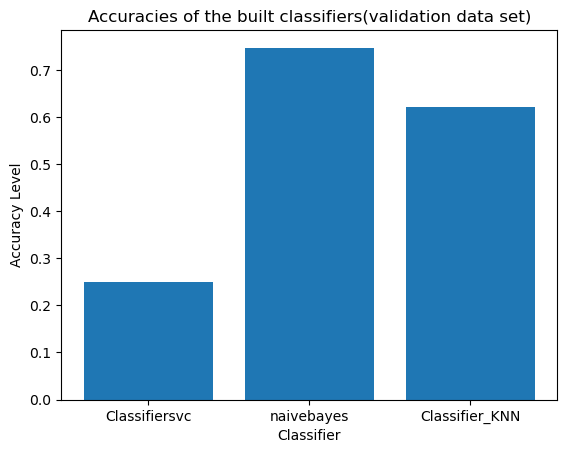

In [135]:

classifiers_names = ['Classifiersvc', 'naivebayes', 'Classifier_KNN']
accuracy_p = [0.24921135646687698, 0.7476340694006309, 0.6214511041009464]
plt.bar(classifiers_names,accuracy_p)
plt.xlabel('Classifier')
plt.ylabel('Accuracy Level')
plt.title('Accuracies of the built classifiers(validation data set)')

plt.show()

In [136]:
print("Test data and predictions")

Test data and predictions


In [137]:
HealthTest_path = "C:/Users/JT/DataSetsforDM/health_test.csv"
HealthTest_data = pd.read_csv(HealthTest_path)
print(HealthTest_data.shape)
HealthTest_data

(528, 25)


,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24
0,PA3001,767,135,F,0.000,0.000,0.000,0.000,0.0,0.0,67.0,0.4,69,4.6,B+,76,67,143,2,0,137,136,138,0,1
1,PA3002,1592,134,F,0.000,0.000,0.010,0.000,0.0,0.0,27.0,2.8,8,26.1,O+,74,89,163,7,1,138,134,138,13,0
2,PA3003,1115,122,M,0.000,0.000,0.000,0.000,0.0,0.0,19.0,1.9,0,15.1,O+,39,103,142,1,0,120,120,122,3,0
3,PA3004,299,148,F,0.000,NaN,0.000,0.000,0.0,0.0,72.0,0.3,59,4.3,O-,14,139,153,1,0,150,148,150,0,1
4,PA3005,1194,133,M,0.003,0.000,0.005,0.000,0.0,0.0,38.0,1.1,0,12.5,A-,58,113,171,5,1,150,147,149,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,PA3524,1071,133,M,0.001,0.000,0.007,0.004,0.0,0.0,27.0,1.7,13,11.4,O+,95,82,177,4,0,147,133,138,43,0
524,PA3525,364,135,F,0.000,0.016,0.002,0.000,0.0,0.0,70.0,0.3,84,3.5,O-,9,132,141,1,0,136,136,137,0,0
525,PA3526,531,142,F,0.016,0.060,0.004,0.000,0.0,0.0,38.0,1.3,0,0.0,B+,130,68,198,5,0,180,173,177,14,1
526,PA3527,878,136,F,0.002,0.000,0.006,0.000,0.0,0.0,39.0,0.9,8,11.2,O+,47,107,154,1,0,138,139,139,2,0


In [142]:
print("Unsupervised Clustering")
HealthTrain_data.head()

Unsupervised Clustering


,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,target
0,PA1001,1406,145.0,1,0.005,0.000,0.002,0.000,0.0,0.0,46.0,0.8,0.0,8.6,O+,67.0,104.0,171.0,4.0,0.0,155.0,153.0,154.0,4.0,1.0,Low risk
1,PA1002,258,127.0,0,0.012,0.000,0.008,0.004,0.0,0.0,13.0,3.8,0.0,1.3,A+,138.0,53.0,191.0,12.0,1.0,133.0,126.0,131.0,41.0,0.0,Low risk
2,PA1003,479,145.0,1,0.000,0.000,0.000,0.002,0.0,0.0,57.0,0.5,0.0,7.3,O+,46.0,111.0,157.0,1.0,1.0,150.0,146.0,149.0,6.0,1.0,Low risk
3,PA1004,906,146.0,1,0.004,0.000,0.005,0.003,0.0,0.0,29.0,1.2,1.0,7.0,O+,62.0,107.0,169.0,2.0,2.0,150.0,147.0,149.0,7.0,0.0,Low risk
4,PA1005,1921,140.0,1,0.002,0.003,0.006,0.006,0.0,0.0,62.0,1.6,0.0,9.1,B+,153.0,75.0,228.0,9.0,0.0,142.0,118.0,142.0,20.0,0.0,Low risk


In [144]:
HealthTrain_data.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24
count,1584.000000,1584.000000,1584.000000,1584.000000,1540.000000,1584.000000,1584.000000,1567.000000,1584.000000,1557.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000
mean,1053.188131,133.297980,0.468434,0.003169,0.009906,0.004347,0.001854,0.000003,0.000157,47.094412,1.337816,10.008838,8.255240,70.409091,93.496843,163.905934,4.063763,0.324495,137.333965,134.542929,137.935606,18.448232,0.309343
std,615.996716,10.002632,0.499160,0.003821,0.048627,0.002948,0.002940,0.000050,0.000593,17.269621,0.899092,18.520206,5.784579,38.993892,29.593370,17.908749,2.950268,0.718499,16.461643,15.729735,14.622680,28.375002,0.615868
min,0.000000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.000000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000
25%,523.750000,126.000000,0.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,36.000000,67.000000,152.000000,2.000000,0.000000,128.000000,125.000000,128.000000,2.000000,0.000000
50%,1049.500000,133.000000,0.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,68.000000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000
75%,1583.250000,141.000000,1.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,10.700000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.250000,148.000000,23.000000,1.000000
max,2125.000000,160.000000,1.000000,0.019000,0.477000,0.014000,0.015000,0.001000,0.005000,86.000000,7.000000,91.000000,50.700000,176.000000,158.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000


In [145]:
HealthTrain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1584 non-null   object 
 1   x1      1584 non-null   int64  
 2   x2      1584 non-null   float64
 3   x3      1584 non-null   int32  
 4   x4      1584 non-null   float64
 5   x5      1540 non-null   float64
 6   x6      1584 non-null   float64
 7   x7      1584 non-null   float64
 8   x8      1567 non-null   float64
 9   x9      1584 non-null   float64
 10  x10     1557 non-null   float64
 11  x11     1584 non-null   float64
 12  x12     1584 non-null   float64
 13  x13     1584 non-null   float64
 14  x14     1584 non-null   object 
 15  x15     1584 non-null   float64
 16  x16     1584 non-null   float64
 17  x17     1584 non-null   float64
 18  x18     1584 non-null   float64
 19  x19     1584 non-null   float64
 20  x20     1584 non-null   float64
 21  x21     1584 non-null   float64
 22  

In [149]:
HealthTrain_data.drop(['id'], axis=1, inplace=True)


KeyError: "['id'] not found in axis"

In [150]:
HealthTrain_data.describe()

HealthTrain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1584 non-null   int64  
 1   x2      1584 non-null   float64
 2   x3      1584 non-null   int32  
 3   x4      1584 non-null   float64
 4   x5      1540 non-null   float64
 5   x6      1584 non-null   float64
 6   x7      1584 non-null   float64
 7   x8      1567 non-null   float64
 8   x9      1584 non-null   float64
 9   x10     1557 non-null   float64
 10  x11     1584 non-null   float64
 11  x12     1584 non-null   float64
 12  x13     1584 non-null   float64
 13  x14     1584 non-null   object 
 14  x15     1584 non-null   float64
 15  x16     1584 non-null   float64
 16  x17     1584 non-null   float64
 17  x18     1584 non-null   float64
 18  x19     1584 non-null   float64
 19  x20     1584 non-null   float64
 20  x21     1584 non-null   float64
 21  x22     1584 non-null   float64
 22  

In [153]:
pd.set_option('display.max_rows', None)

HealthTrain_data.isna().mean() * 100


x1        0.000000
x2        0.000000
x3        0.000000
x4        0.000000
x5        2.777778
x6        0.000000
x7        0.000000
x8        1.073232
x9        0.000000
x10       1.704545
x11       0.000000
x12       0.000000
x13       0.000000
x14       0.000000
x15       0.000000
x16       0.000000
x17       0.000000
x18       0.000000
x19       0.000000
x20       0.000000
x21       0.000000
x22       0.000000
x23       0.000000
x24       0.000000
target    0.000000
dtype: float64

In [154]:
HealthTrain_data['x5'].fillna(HealthTrain_data['x5'].median(), inplace=True)
HealthTrain_data['x8'].fillna(HealthTrain_data['x8'].median(), inplace=True)
HealthTrain_data['x10'].fillna(HealthTrain_data['x10'].median(), inplace=True)

HealthTrain_data.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24
count,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000
mean,1053.188131,133.297980,0.468434,0.003169,0.009631,0.004347,0.001854,0.000003,0.000157,47.126894,1.337816,10.008838,8.255240,70.409091,93.496843,163.905934,4.063763,0.324495,137.333965,134.542929,137.935606,18.448232,0.309343
std,615.996716,10.002632,0.499160,0.003821,0.047974,0.002948,0.002940,0.000050,0.000593,17.123488,0.899092,18.520206,5.784579,38.993892,29.593370,17.908749,2.950268,0.718499,16.461643,15.729735,14.622680,28.375002,0.615868
min,0.000000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.000000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000
25%,523.750000,126.000000,0.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,36.000000,67.000000,152.000000,2.000000,0.000000,128.000000,125.000000,128.000000,2.000000,0.000000
50%,1049.500000,133.000000,0.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,68.000000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000
75%,1583.250000,141.000000,1.000000,0.006000,0.002000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,10.700000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.250000,148.000000,23.000000,1.000000
max,2125.000000,160.000000,1.000000,0.019000,0.477000,0.014000,0.015000,0.001000,0.005000,86.000000,7.000000,91.000000,50.700000,176.000000,158.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000


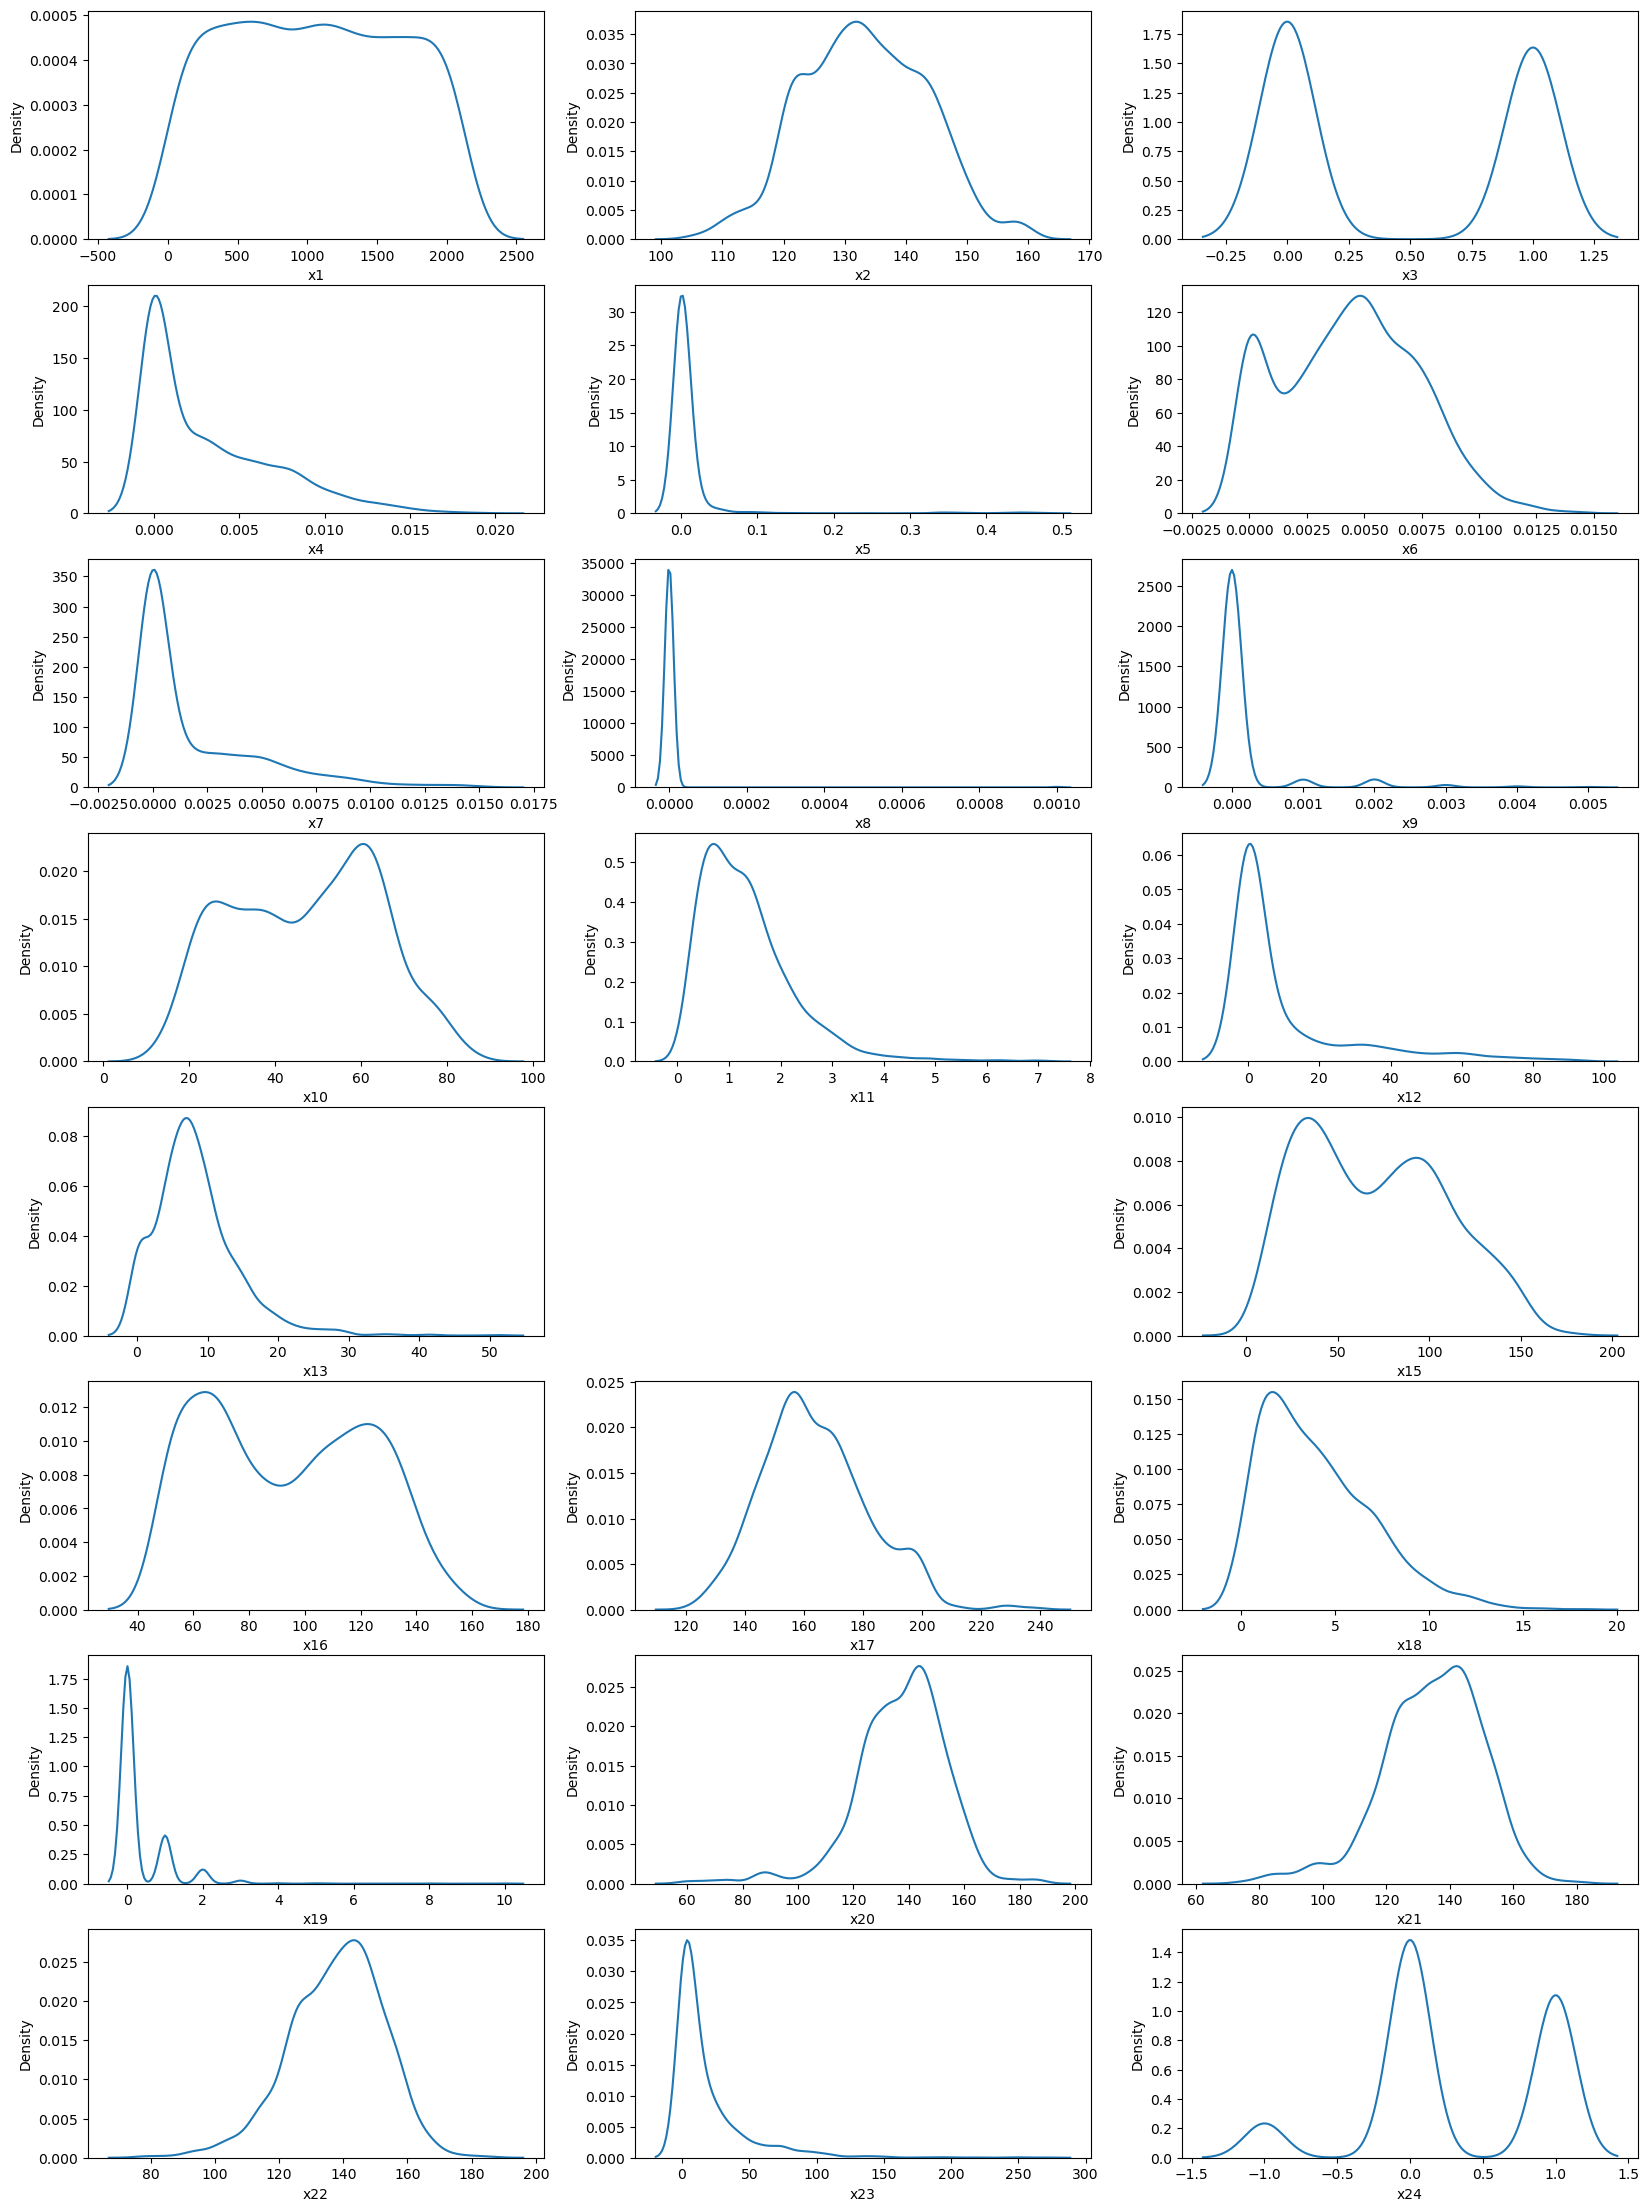

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,35))
for i, col in enumerate(HealthTrain_data.columns):
    if HealthTrain_data[col].dtype != 'object':
        ax = plt.subplot(10, 3, i+1)
        sns.kdeplot(HealthTrain_data[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

In [173]:
cols = ['x3','x4', 'x5', 'x7', 'x8','x9','x11','x12','x13','x19','x23','x24']

In [174]:
for col in cols:
    HealthTrain_data[col] = np.log1p(HealthTrain_data[col])

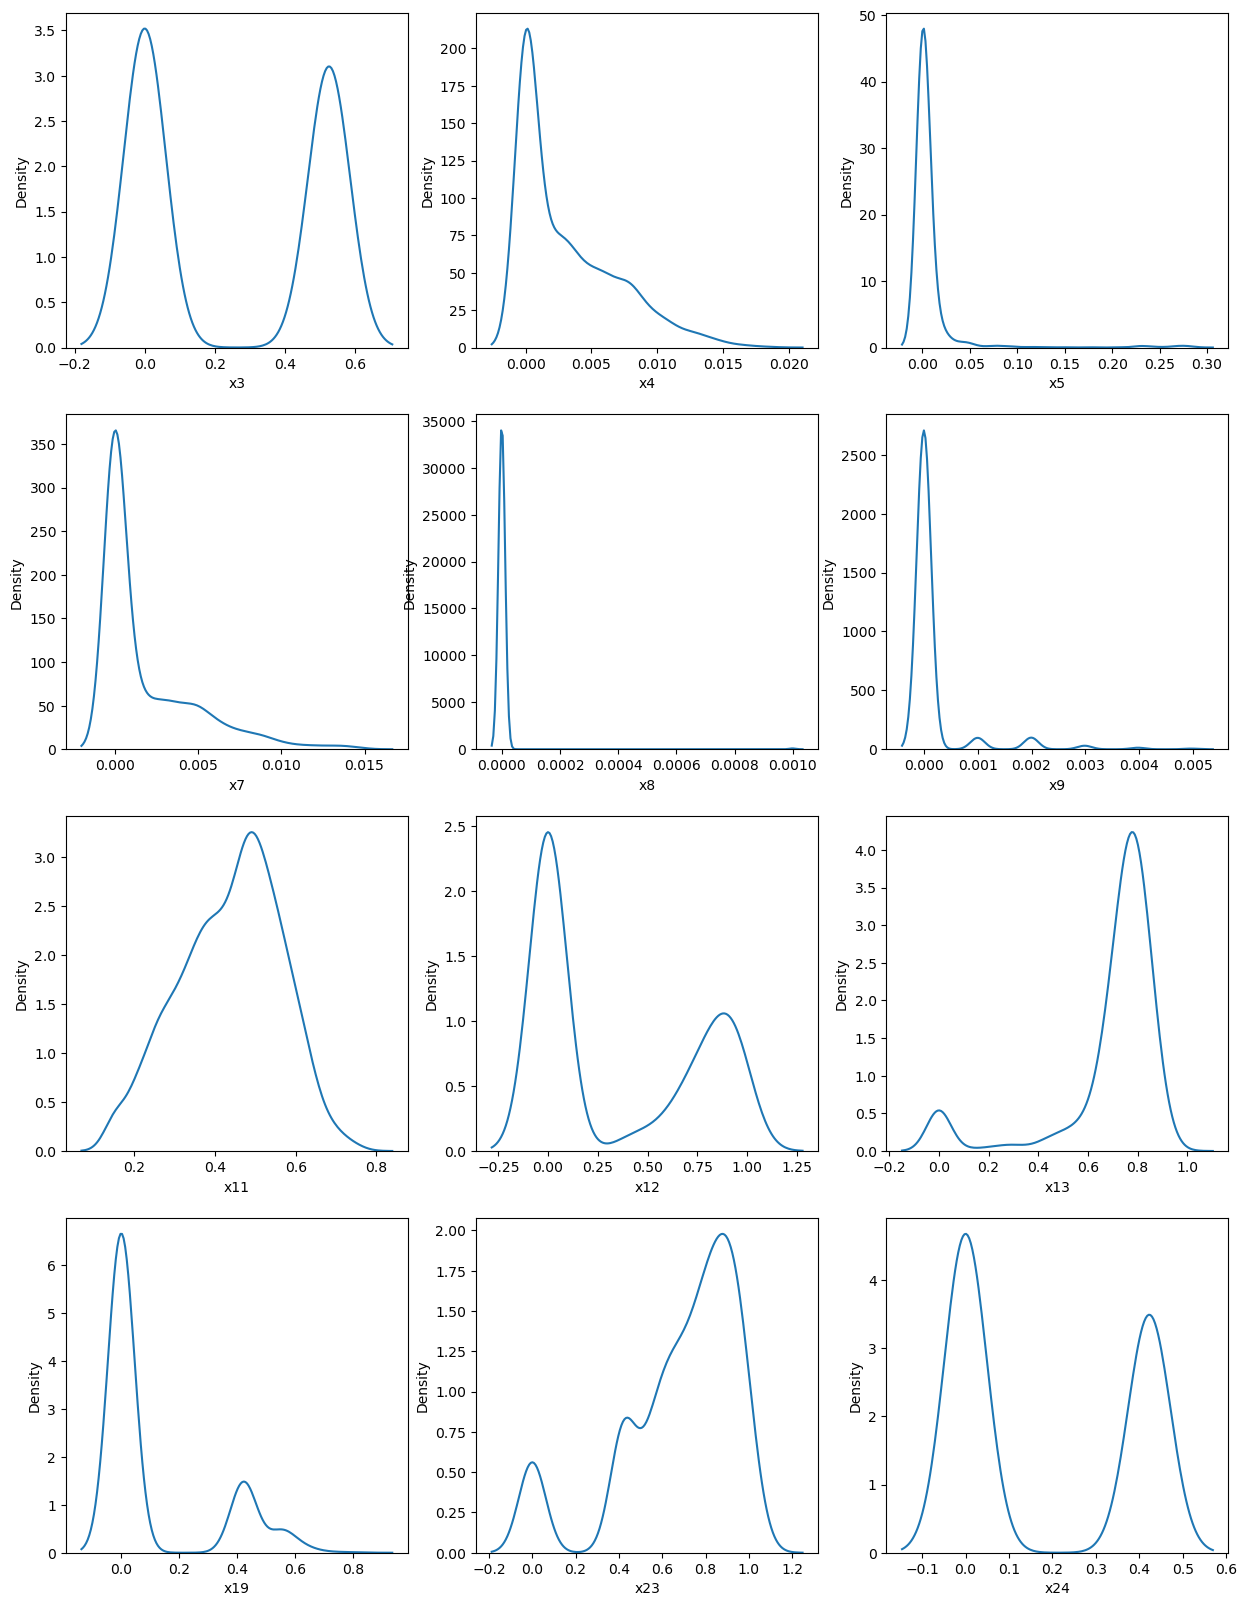

In [175]:
plt.figure(figsize=(15,20))
for i, col in enumerate(cols):
    ax = plt.subplot(4, 3, i+1)
    sns.kdeplot(HealthTrain_data[col], ax=ax)
plt.show()

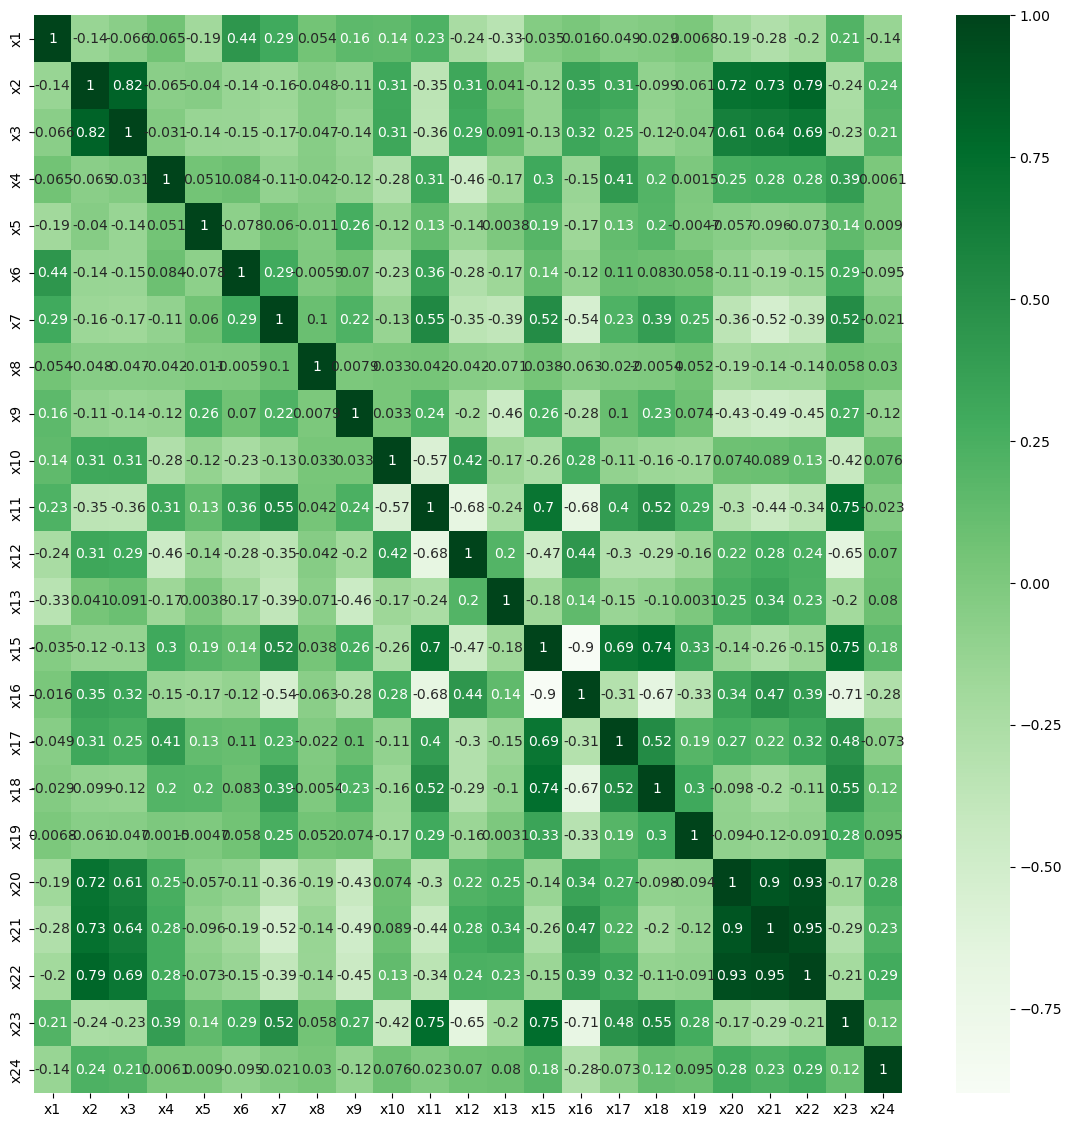

In [176]:
plt.figure(figsize=(14,14))
sns.heatmap(HealthTrain_data.corr(), annot=True, cmap='Greens')
plt.show()

In [195]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack,csr_matrix
one_tencoder = OneHotEncoder()
test_X_encoded = one_hencoder.fit_transform(HealthTest_data)
if test_X_encoded.shape[1] < train_X_encoded.shape[1]:
    missing_columns = train_X_encoded.shape[1] - test_X_encoded.shape[1]
    test_X_encoded = hstack([test_X_encoded, csr_matrix((test_X_encoded.shape[0], missing_columns))], format='csr')
#test_predictionsnb = naivebayes.predict(test_X_encoded.toarray())
#print(test_predictionsnb)        
test_predictionssvc = Classifiersvc.predict(test_X_encoded)
print(test_predictionssvc)        


[1 0 2 2 2 0 0 2 2 2 1 2 0 1 0 0 2 2 2 2 1 1 2 2 0 1 2 2 0 1 0 0 2 0 0 0 0
 0 2 1 2 1 0 0 1 2 2 1 0 1 0 2 2 1 2 0 2 0 2 2 0 2 2 2 2 2 2 1 2 2 2 1 2 0
 0 1 0 2 2 2 0 1 2 0 2 1 0 0 2 0 2 2 1 2 2 2 0 2 0 2 0 1 1 0 2 0 0 0 0 1 1
 1 1 2 0 0 0 2 2 2 0 0 1 2 2 0 0 0 1 1 2 1 1 2 1 0 2 0 2 0 2 0 2 0 2 0 1 1
 1 2 2 0 2 1 0 0 2 1 2 0 2 2 1 1 2 2 2 0 0 2 2 0 0 0 0 0 2 0 1 0 0 1 0 0 2
 1 1 0 1 2 0 2 1 1 0 1 1 2 1 1 1 2 0 0 0 0 1 2 1 2 0 0 0 1 2 1 0 2 2 1 0 0
 1 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 2 0 0 1 1 1 1 2 0 0 0 1 2 1 1 1 2 2 2 1
 1 1 2 2 1 2 2 1 1 2 0 1 1 2 1 2 2 1 0 1 1 0 2 0 2 1 1 2 1 1 0 2 2 1 0 0 1
 1 1 2 2 2 1 2 1 0 2 2 0 0 1 1 0 2 0 2 0 2 2 0 2 1 2 0 0 1 2 1 2 2 2 2 2 2
 0 1 0 1 0 2 0 1 1 2 1 0 0 2 1 0 0 0 2 0 2 2 1 0 2 0 0 0 0 2 1 1 0 1 0 2 1
 2 1 1 0 2 1 1 2 0 1 2 1 1 2 2 0 0 2 2 1 0 1 2 2 1 1 2 0 0 2 2 0 2 2 1 0 0
 2 2 0 0 2 0 1 2 1 1 1 0 2 0 2 0 2 2 0 2 1 0 2 2 2 2 1 1 0 2 2 2 1 0 0 1 0
 1 2 0 0 2 0 1 2 2 1 0 2 0 1 2 2 2 0 0 2 2 1 0 0 1 1 0 1 0 1 2 2 2 0 2 1 2
 1 2 1 0 2 0 2 0 1 0 2 1 